# Brainstation Capstone Project

## Data Science Bootcamp: November 2023 - February 2024

Welcome to my Capstone Project for the Brainstation Data Science Bootcamp. This project represents the culmination of intensive learning and hands-on experience in data science from November 2023 to February 2024.

# Project Overview

## Project Description
This capstone project is centered around developing a predictive analysis tool in medical data science, focusing on diseases like heart failure, stroke, diabetes, and cancer. The aim is to create a model that predicts the likelihood of these health conditions based on medical and demographic data.

## Objective
The primary goal is to leverage data science and machine learning to provide early warnings for critical health conditions, aiding in early diagnosis and improving patient outcomes.

## Key Challenges
- **Data Quality and Reliability**: Ensuring the datasets used are accurate and reliable.
- **Model Accuracy and Validation**: Building models that are not only accurate but also clinically valid.
- **Handling Imbalanced Data**: Dealing with the common issue of imbalanced datasets in medical data.
- **Ethical Considerations**: Addressing data privacy and ethical concerns in predictive healthcare analytics.

## Technologies Used
- **Programming Languages**: Python, including libraries like Pandas, NumPy, and Scikit-learn.
- **Data Visualization**: Using Matplotlib and Seaborn for insights visualization.
- **Machine Learning Frameworks**: Exploring TensorFlow or PyTorch for advanced modeling.

## Expected Outcomes
- **Project**: A robust predictive model for disease risk assessment.
- **Personal Development**: Improved expertise in data science and machine learning, with a focus on healthcare applications.

## Why This Project?
I am deeply interested in the convergence of data science and healthcare. This project offers the opportunity to impact patient care through predictive analytics, aligning with my passion for applying data science to solve real-world problems and enhancing my skills in this critical area.


---

Feel free to explore the different sections of this notebook to see the progress, analysis, and results of my capstone project. I appreciate any feedback or suggestions!


# Masoud Arefi

Welcome to my professional portfolio in Data Science. Below are links to my LinkedIn profile and GitHub repository where you can find my projects and contributions.

## Connect with Me

- [LinkedIn](https://www.linkedin.com/in/masoud-arefi/)
- [GitHub](https://github.com/MaSOouD69/capstone-repo)

### About Me

I am a passionate data science professional with a keen interest in developing insightful data-driven solutions. My expertise lies in leveraging analytical tools and machine learning techniques to unravel complex data challenges.

Feel free to explore my projects and reach out for collaborations or discussions!


# First Data set 
# Stroke Prediction and Analysis

## Introduction

Strokes significantly impact global health, with a surprising fact: 80% of strokes are preventable. This notebook explores key indicators leading to strokes, using data from diverse age groups, genders, habits, and health issues. Our visualizations aim to be intuitive, employing simple yet effective methods for conveying essential information.

## Problem Statement

Our goal is to visualize the relationships between various lifestyle habits and heart stroke occurrences. We aim to predict stroke probability using optimally tuned models, providing insights for preventive health measures.

## Questions and Assumptions

In this analysis, we will investigate several questions and assumptions:

1. **Impact of Age**: Does age significantly influence stroke occurrence, and what is its distribution across populations?
2. **BMI and Glucose Levels**: How do higher body mass index and glucose levels correlate with stroke risk?
3. **Smoking and Stroke Risk**: Is there a strong link between smoking and increased stroke risk?
4. **Heart Disease and Stroke**: How closely are existing heart diseases and stroke occurrences related?
5. **Workload and Blood Pressure**: Can high workload and resultant blood pressure increases lead to strokes?
6. **Gender-Specific Risks**: Are males more prone to strokes due to work-related stress, or do risks vary across genders?

## Methodology

- **Data Analysis**: Comprehensive examination of the dataset to understand feature distribution and relationships.
- **Visualizations**: Using plots and charts to uncover patterns and insights.
- **Statistical Testing**: Validating assumptions and hypotheses through statistical methods.
- **Model Building**: Developing predictive models for stroke risk estimation.
- **Feature Importance**: Identifying key factors that significantly influence stroke risk.
- **Feature Selection**: Enhancing model accuracy by selecting relevant features.

## Conclusion

This notebook aims to provide a deeper understanding of the factors leading to strokes and their interplay, essential for developing preventive strategies and early interventions.


In [1]:
# libraries import
import numpy as np  # Importing NumPy for numerical operations and array handling
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for creating static plots


# Importing necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Importing various metrics to evaluate model performance

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  # Importing different scalers for data normalization and standardization

# metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  # Additional metrics for model evaluation, especially for classification problems

from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors classifier
from sklearn.tree import DecisionTreeClassifier  # Importing Decision Tree classifier for decision tree models

from imblearn.over_sampling import SMOTE  # Importing SMOTE for handling imbalanced datasets by oversampling

from sklearn.svm import SVC  # Importing Support Vector Machine classifier


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


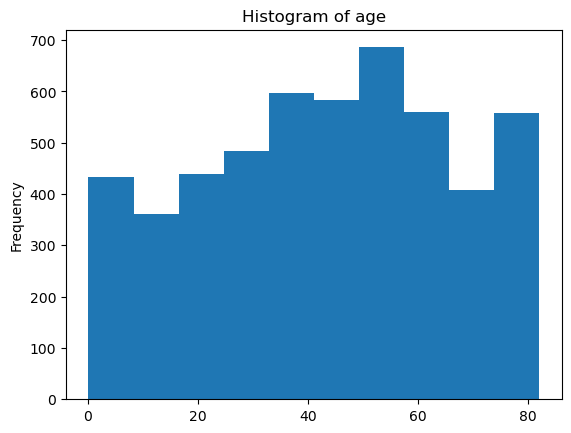

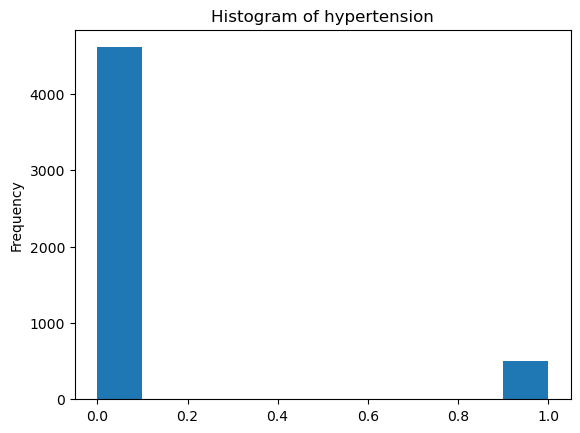

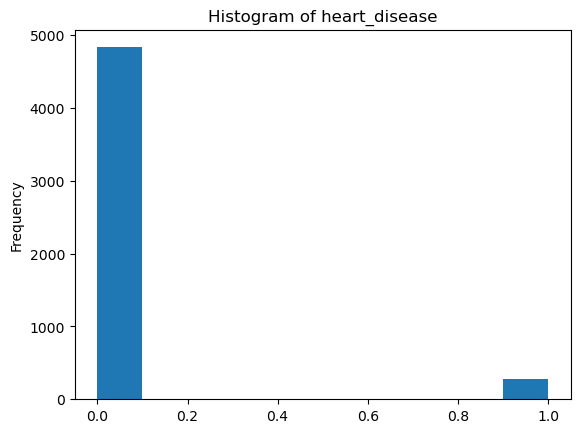

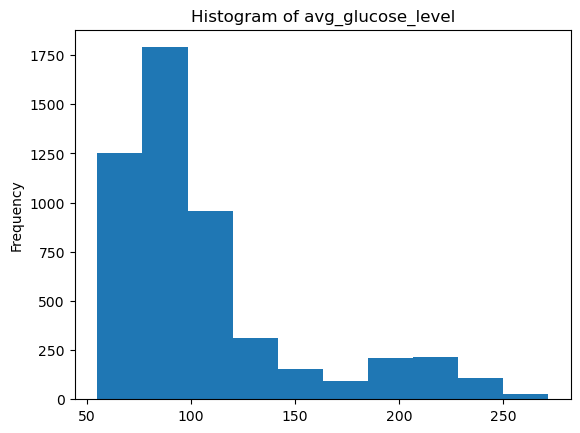

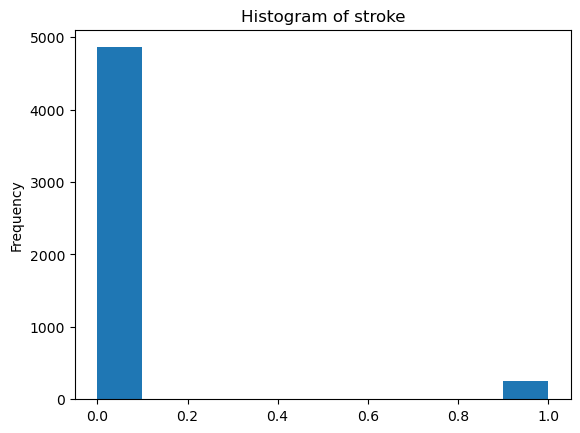

In [6]:
# Loop through each column and plot a histogram for each numeric columns
for i in ['age','hypertension','heart_disease','avg_glucose_level','stroke']:
    plt.figure()  # Create a new figure for each plot
    df[i].plot(kind='hist')
    plt.title(f'Histogram of {i}')
    plt.show()  # Display the plot

From histogramof Stroke distribution it is clear that every 5 people out of 100 people are having strokes from our sampling data. Moreover,this is a highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

In [7]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

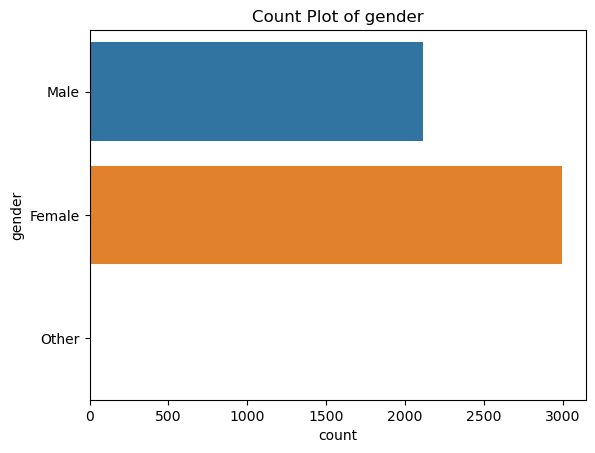

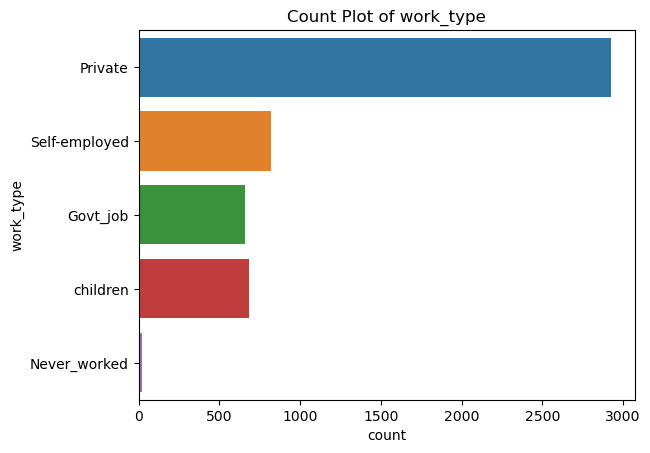

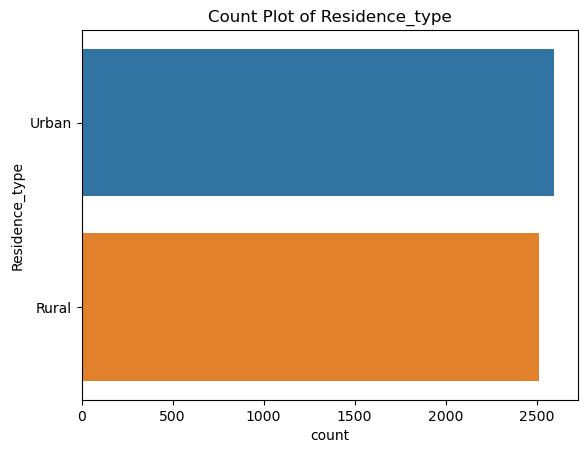

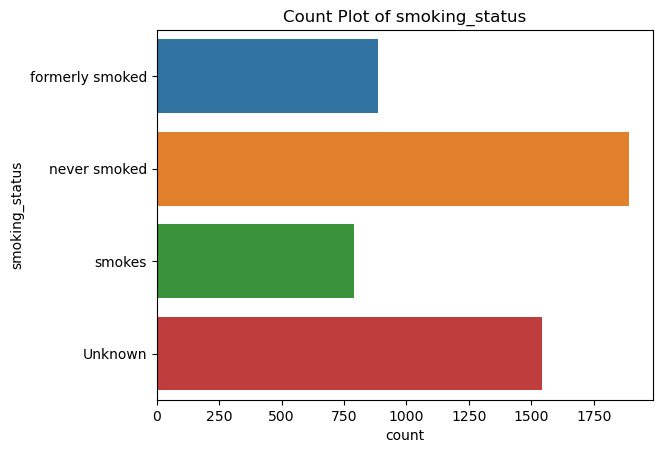

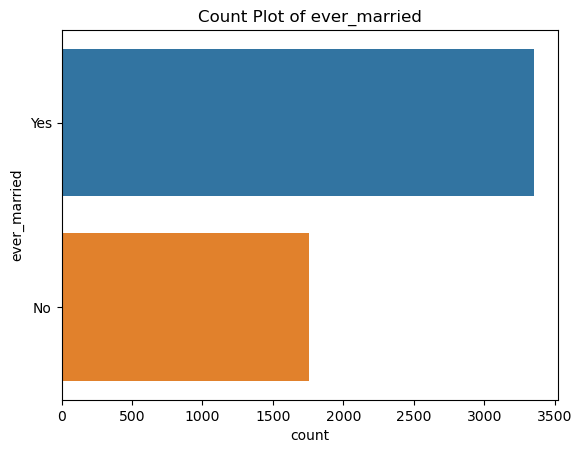

In [8]:
non_num_df = ['gender','work_type','Residence_type','smoking_status','ever_married']
for i in non_num_df:
    plt.figure()  # Create a new figure for each p
    
    # For non-numeric data, use a count plot
    sns.countplot(y=df[i], data=df)
    plt.title(f'Count Plot of {i}')

    plt.show()  # Display the plot

In [9]:
df[['gender','work_type','Residence_type','smoking_status','ever_married']].head()

gender      work_type Residence_type   smoking_status ever_married
0    Male        Private          Urban  formerly smoked          Yes
1  Female  Self-employed          Rural     never smoked          Yes
2    Male        Private          Rural     never smoked          Yes
3  Female        Private          Urban           smokes          Yes
4  Female  Self-employed          Rural     never smoked          Yes

In [10]:
# look at null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]
df_null_bmi.head()

id  gender   age  hypertension  heart_disease ever_married  \
1   51676  Female  61.0             0              0          Yes   
8   27419  Female  59.0             0              0          Yes   
13   8213    Male  78.0             0              1          Yes   
19  25226    Male  57.0             0              1           No   
27  61843    Male  58.0             0              0          Yes   

        work_type Residence_type  avg_glucose_level  bmi smoking_status  \
1   Self-employed          Rural             202.21  NaN   never smoked   
8         Private          Rural              76.15  NaN        Unknown   
13        Private          Urban             219.84  NaN        Unknown   
19       Govt_job          Urban             217.08  NaN        Unknown   
27        Private          Rural             189.84  NaN        Unknown   

    stroke  
1        1  
8        1  
13       1  
19       1  
27       1

Use visalization for null values

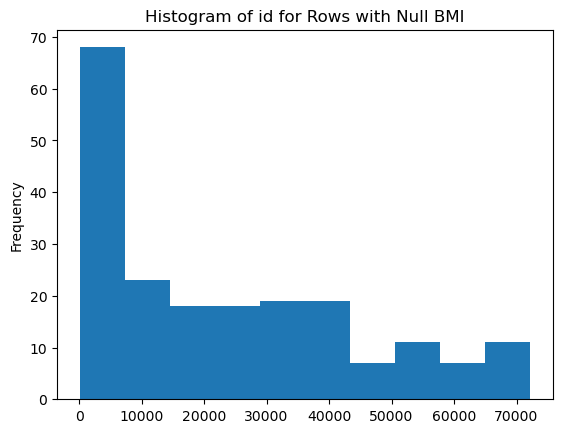

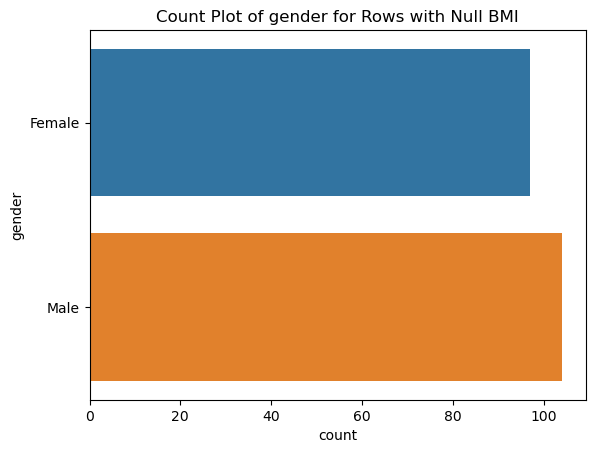

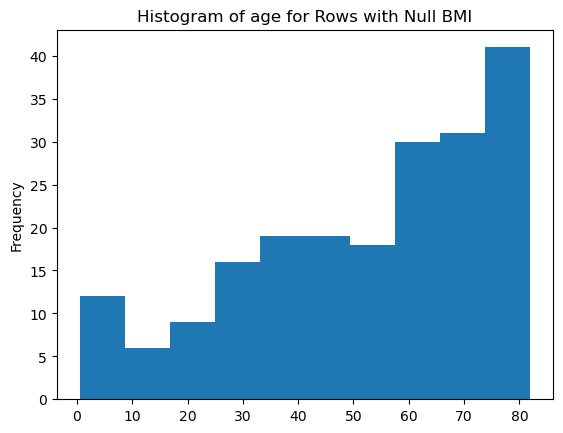

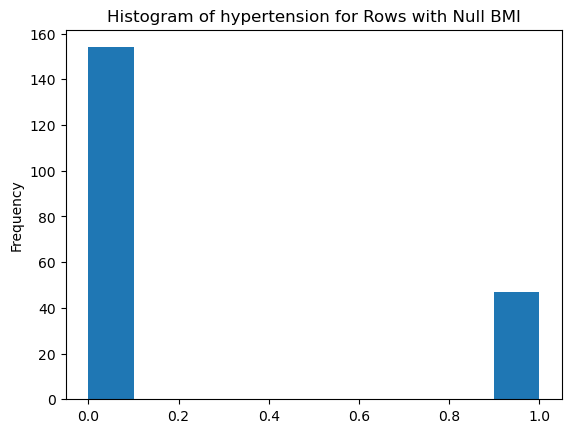

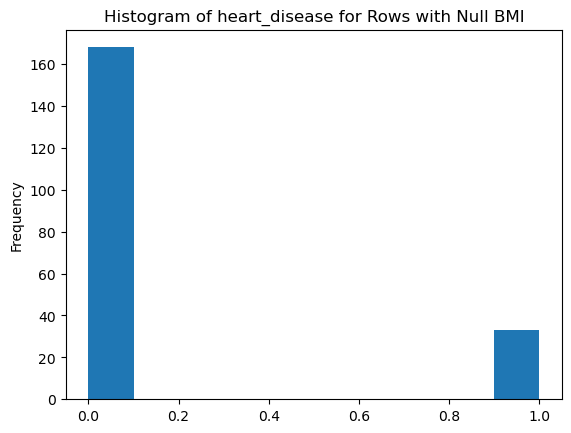

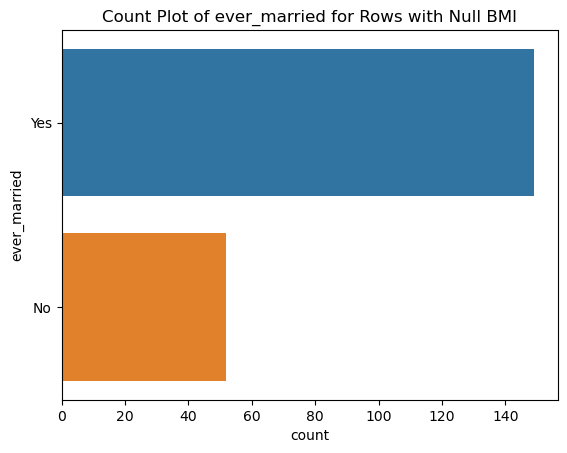

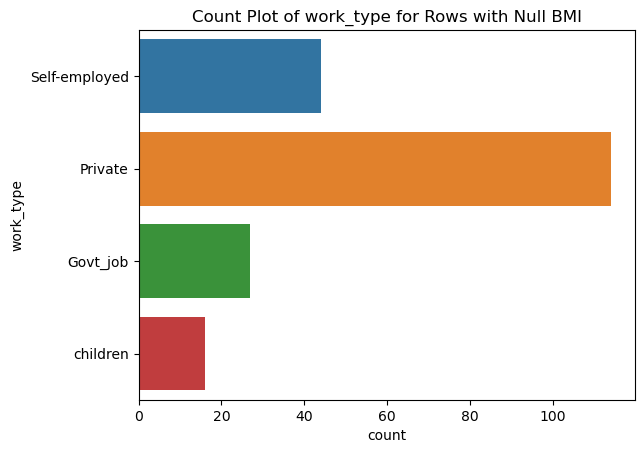

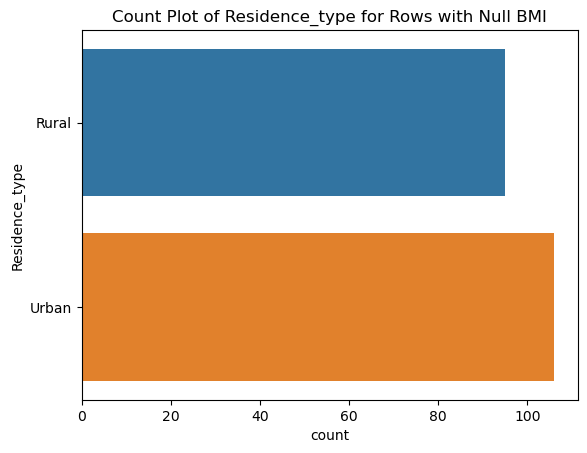

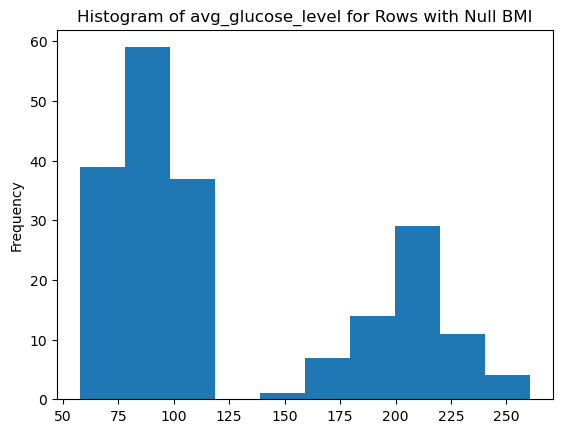

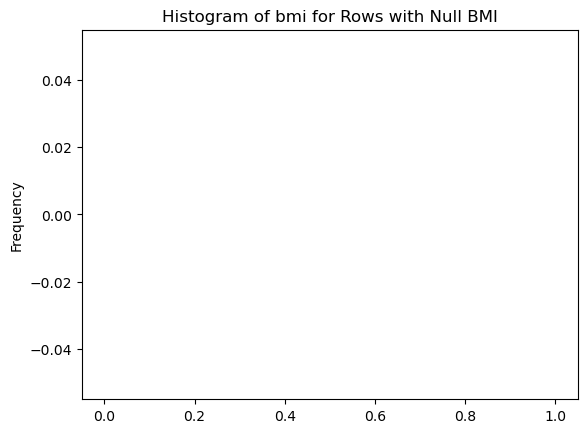

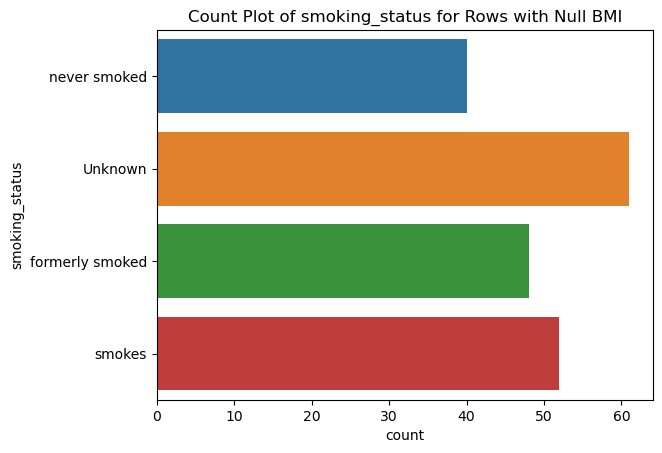

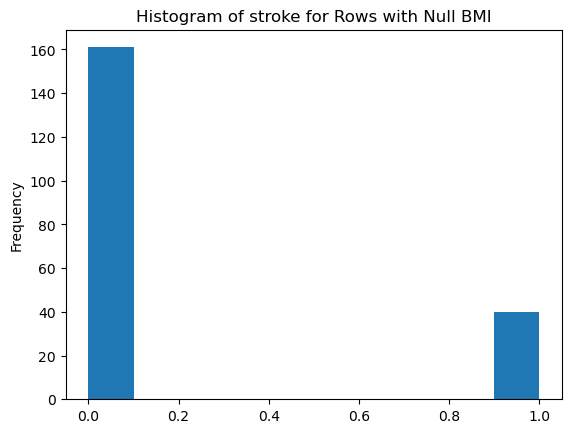

In [12]:
# Filter the DataFrame for rows where 'bmi' is null
df_null_bmi = df[df['bmi'].isna()]

# Loop through each column
for i in df_null_bmi.columns:
    plt.figure()  # Create a new figure for each plot

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df_null_bmi[i]):
        df_null_bmi[i].plot(kind='hist')
        plt.title(f'Histogram of {i} for Rows with Null BMI')
    else:
        # For non-numeric data, use a count plot
        sns.countplot(y=i, data=df_null_bmi)
        plt.title(f'Count Plot of {i} for Rows with Null BMI')

    plt.show()  # Display the plot

As we observe the visuals for both the entire DataFrame and the subset with null BMI values, the most standout feature is the 'glucose' column. Let's take a closer look at distributions.

Text(0.5, 1.0, 'Histogram of avg_glucose_level for Rows with Null BMI')

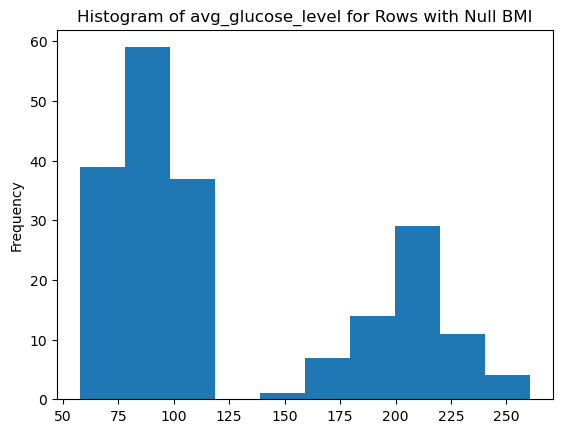

In [13]:
# avg_glucose_level for whole dataframe
df_null_bmi['avg_glucose_level'].plot(kind='hist')
plt.title(f'Histogram of avg_glucose_level for Rows with Null BMI')

Text(0.5, 1.0, 'Histogram of avg_glucose_level')

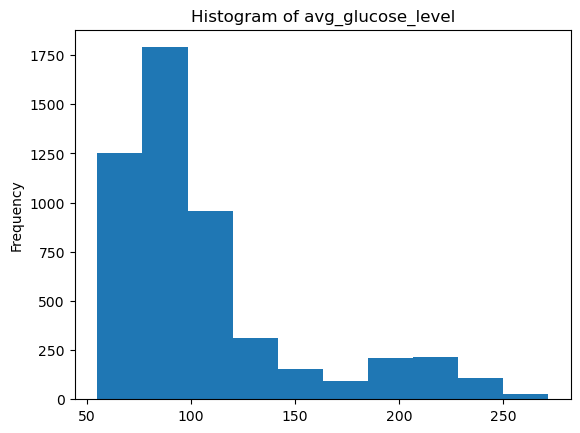

In [14]:
    # # avg_glucose_level for whole dataframe
    df['avg_glucose_level'].plot(kind='hist')
    plt.title('Histogram of avg_glucose_level')

The distribution of average glucose levels shows noticeable differences between the original dataset and the subset with missing BMI values. Notably, 4 percent of the data is missing, and this missingness does not appear to be random. To address this, it's advisable to retain the records with missing BMI values. However, adding a new column to indicate whether the BMI is missing could be beneficial for machine learning methods. This approach allows us to maintain data integrity while providing a clear indicator for our models to handle these missing values appropriately.

In [15]:
# deal with missing data
df['missing bmi'] = df['bmi'].isna()

In [16]:
df['bmi'].isna().sum()

201

In [17]:
#check for duplicate rows
df.duplicated().sum()

0

There is no duplicated record in the data set

In [18]:
# fill missing data with median
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))

In [19]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
missing bmi          0
dtype: int64

In [20]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  missing bmi  
0       1        False  
1       1         True  
2       1        False  
3       1        False  
4       1        False

# Dataset Overview

Our dataset contains a mix of categorical and numerical features, with a focus on health-related measurements. Here's a breakdown of the features:

## Categorical Features
- `gender`: Gender of the individual
- `ever_married`: Marital status
- `work_type`: Type of occupation
- `Residence_type`: Type of residence (Urban/Rural)
- `smoking_status`: Smoking status

## Binary Numerical Features
- `hypertension`: Presence of hypertension (0 = No, 1 = Yes)
- `heart_disease`: Presence of heart disease (0 = No, 1 = Yes)
- `stroke`: Occurrence of stroke (0 = No, 1 = Yes)

## Continuous Numerical Features
- `age`: Age of the individual
- `avg_glucose_level`: Average glucose level in blood
- `bmi`: Body Mass Index

**Note**: The `bmi` feature has missing data that needs to be addressed. Most of our data is categorical, which will require special attention for visualization. For feature extraction, we can consider binning the continuous features (age, avg_glucose_level, and bmi) while keeping other features as they are.


### Story telling with data

### Data Binning Strategies

In our analysis, we'll be binning several key variables to categorize our data more effectively. Below are the binning strategies for Body Mass Index (BMI), age, and average glucose levels, along with references for each categorization method.

#### Body Mass Index (BMI) Binning

BMI is a key health indicator used to categorize individuals into different weight statuses. The binning of BMI will be based on standard medical categories. 

Reference: [Body Mass Index Categories](https://www.medicalnewstoday.com/articles/323446#body-mass-index)

#### Age Binning

Categorizing individuals into different life stages based on age can be particularly relevant in studies where age is a significant factor.

Reference: [Age and Physical Description](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)

#### Average Glucose Level Binning

Binning average glucose levels helps in categorizing individuals based on their blood sugar levels, crucial in studies related to diabetes and metabolic health.

Reference: [Normal Blood Sugar Level Chart](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)


In [21]:
# Binning continuous features for better categorization
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 140, 200, 500], labels=['Low', 'Normal', 'High', 'Very High'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Display the first few rows of the modified DataFrame
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  missing bmi age_category glucose_category bmi_category  
0       1        False       Senior        Very High        Obese  
1       1         True       Senior        Very High   Overweight  
2       1        False       Senior           Normal        Obese  
3       1        False        Adult             High        Obese  
4       1        False       Senior             High       Normal

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  missing bmi        5110 non-null   bool    
 13  age_category       5110 non-null   category
 14  glucose_category   5110 non-null   category
 15  bmi_category       5110 non-null   category
dtypes: boo

##### take a closer look at data with ratio of stroke

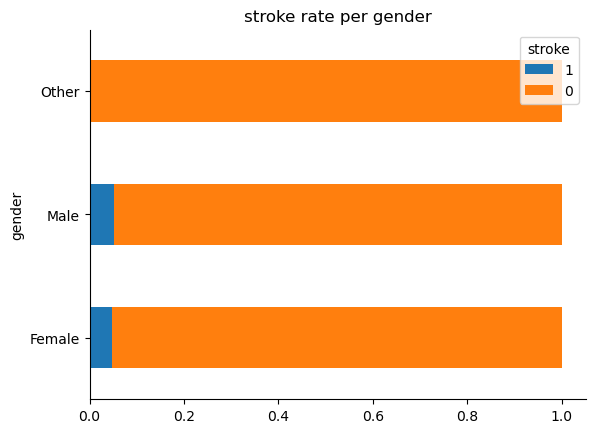

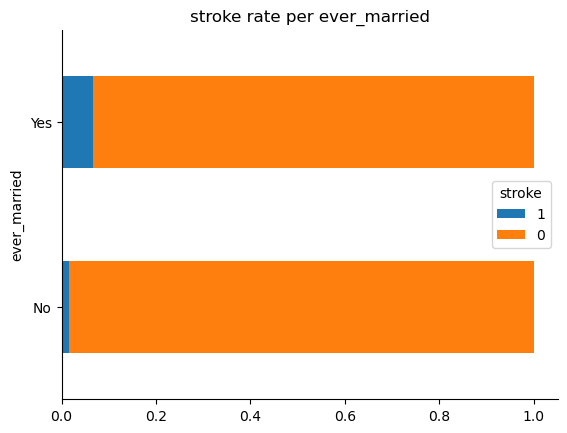

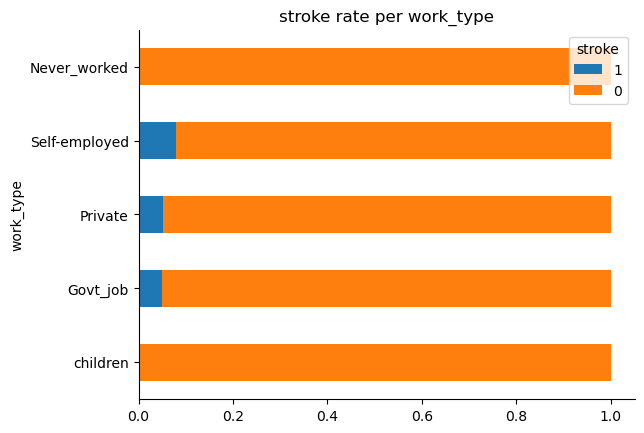

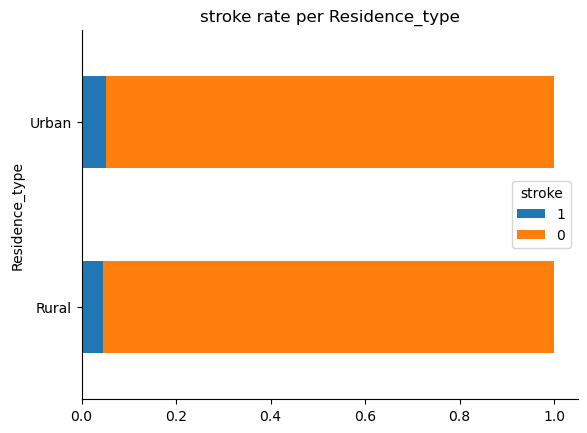

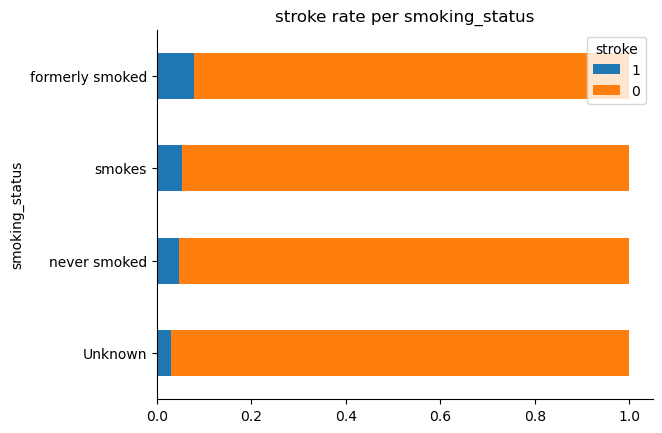

In [23]:
# visualization for columns with object data type
for col in df.select_dtypes('object').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col}")
    sns.despine()
    plt.show()
    

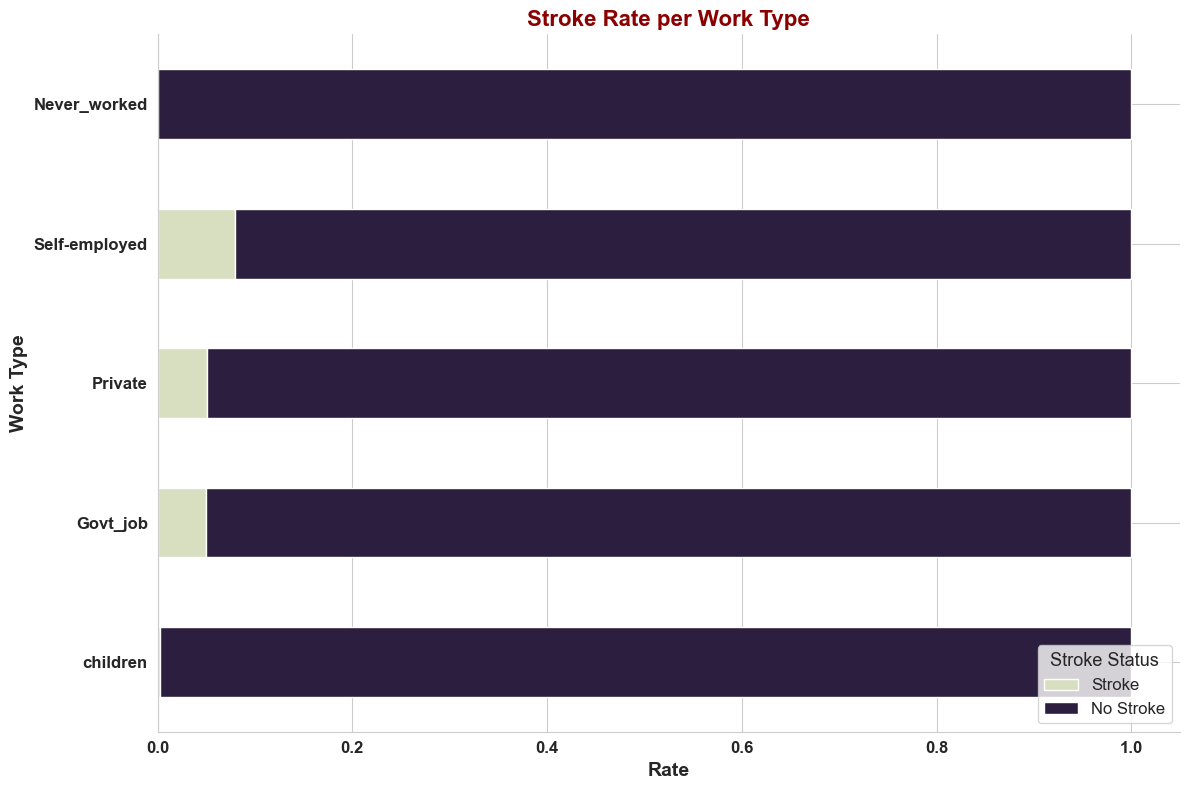

In [24]:

col = 'Work Type'  # Replace with the actual column name if different

# Calculate the rate
rate_data = df.groupby(['work_type', 'stroke'])['stroke'].count() / df.groupby('work_type')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Work Type', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()



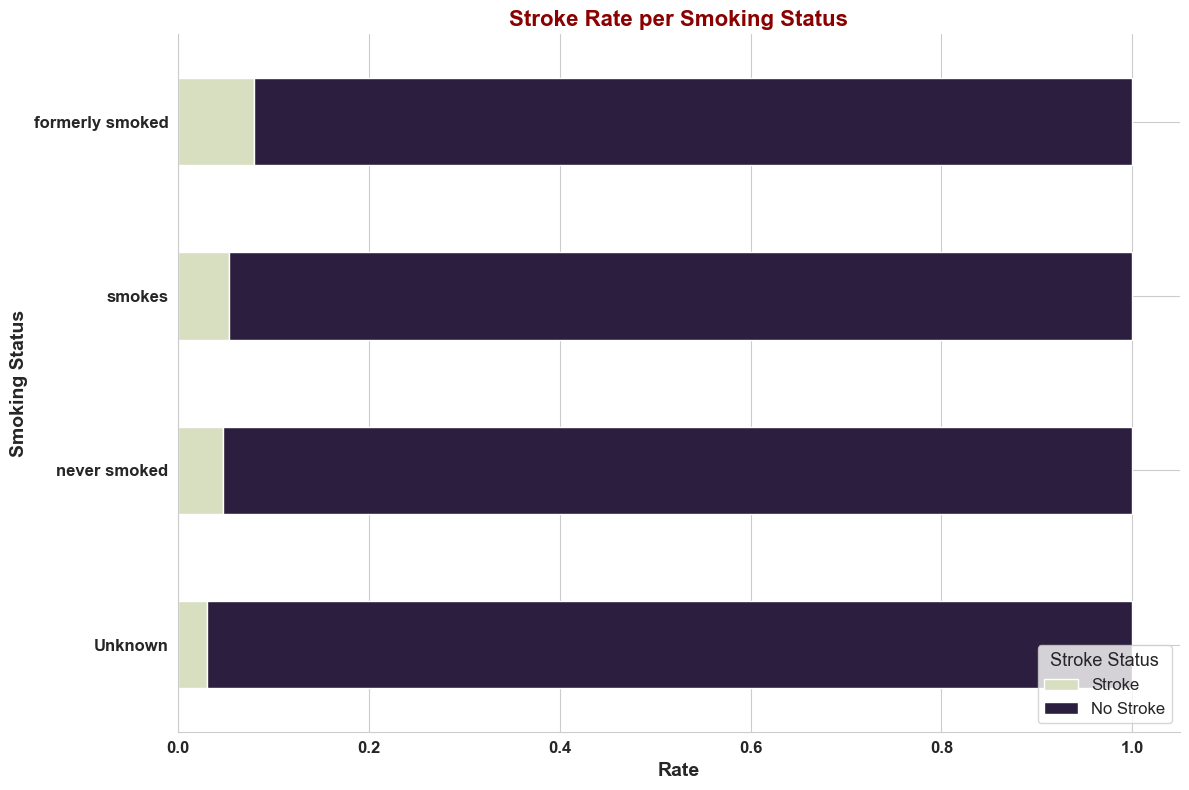

In [25]:

col = 'Smoking Status'

# Calculate the rate for Smoking Status
rate_data = df.groupby(['smoking_status', 'stroke'])['stroke'].count() / df.groupby('smoking_status')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Smoking Status', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()



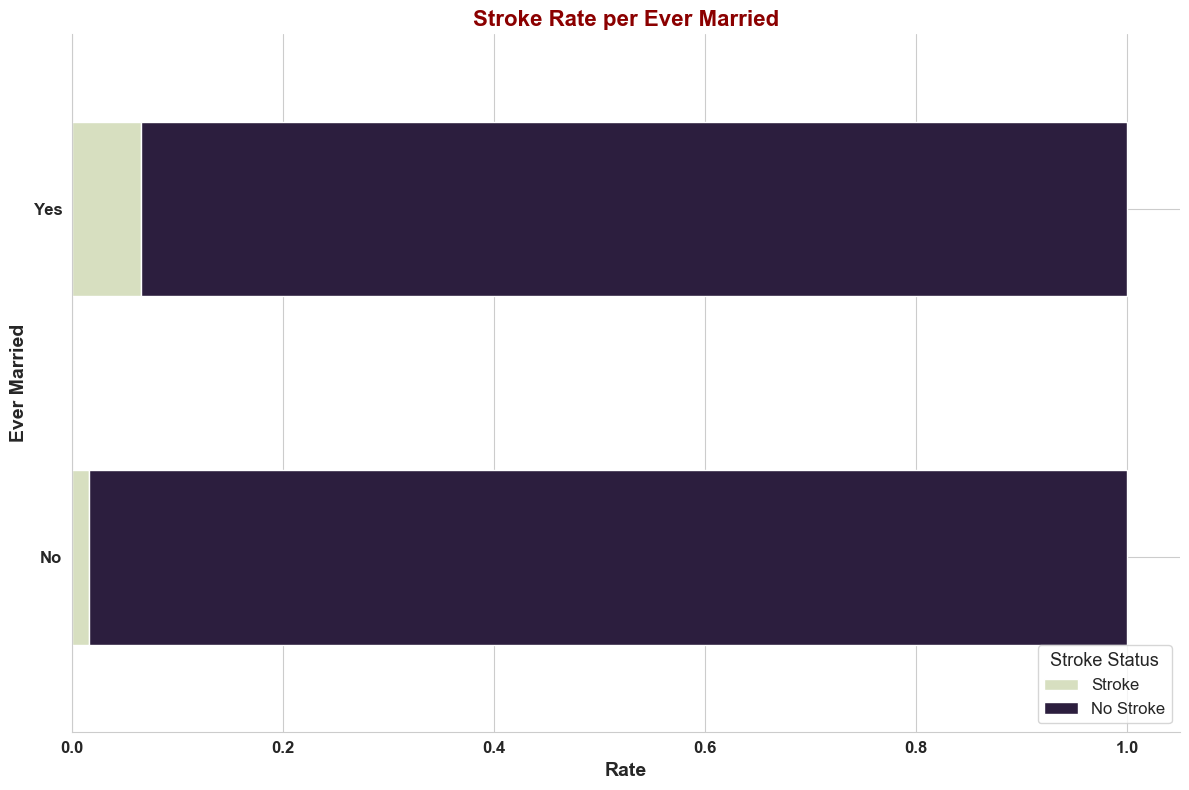

In [26]:


col = 'Ever Married'

# Calculate the rate for Ever Married status
rate_data = df.groupby(['ever_married', 'stroke'])['stroke'].count() / df.groupby('ever_married')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title(f"Stroke Rate per {col}", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('Ever Married', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()


<Figure size 1200x800 with 0 Axes>

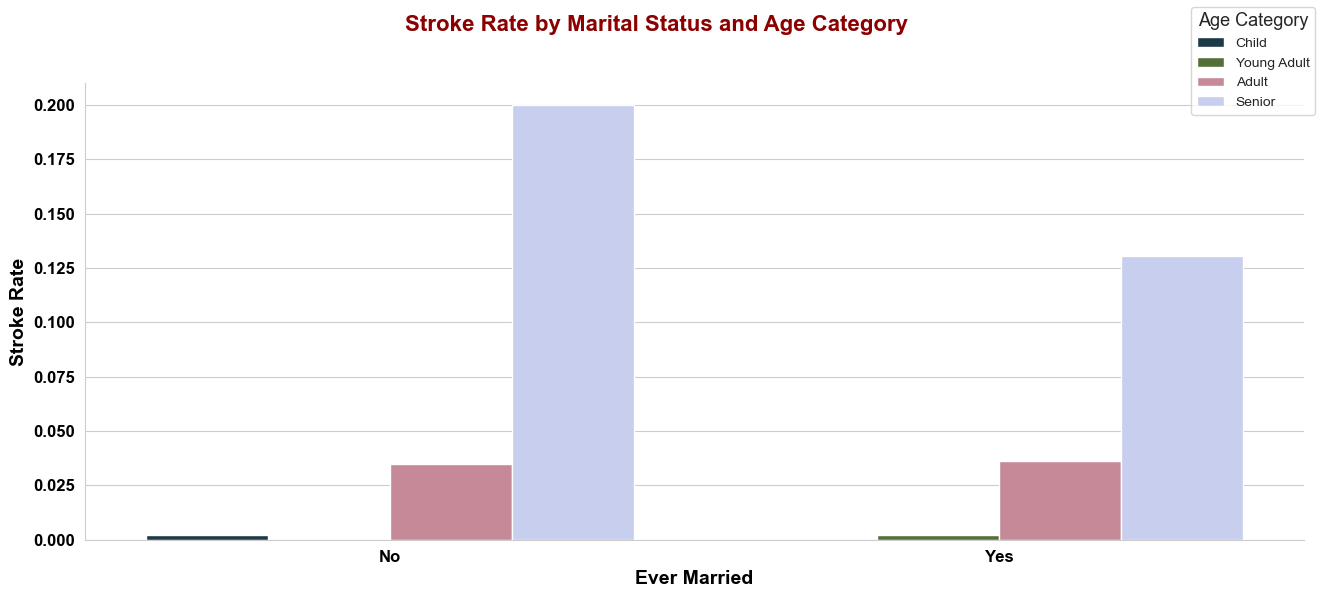

In [27]:

# Calculate the rate
rate_data = df.groupby(['ever_married', 'age_category', 'stroke']).size() / df.groupby(['ever_married', 'age_category']).size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting with age category hue
bar_plot = sns.catplot(x='ever_married', y='rate', hue='age_category', data=stroke_rate_data, kind='bar', palette='cubehelix', height=6, aspect=2)

# Adding title and labels with enhanced formatting
bar_plot.fig.suptitle("Stroke Rate by Marital Status and Age Category", fontsize=16, fontweight='bold', color='darkred')
bar_plot.set_axis_labels("Ever Married", "Stroke Rate", fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjusting the legend for minimalism
# Remove the existing legend and use the one automatically generated by Seaborn
bar_plot._legend.remove()
bar_plot.fig.legend(title='Age Category', loc='upper right', fontsize='medium', title_fontsize='13')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout
plt.show()



In [28]:
df['age_category'].value_counts()

Adult          1907
Senior         1304
Young Adult     983
Child           916
Name: age_category, dtype: int64

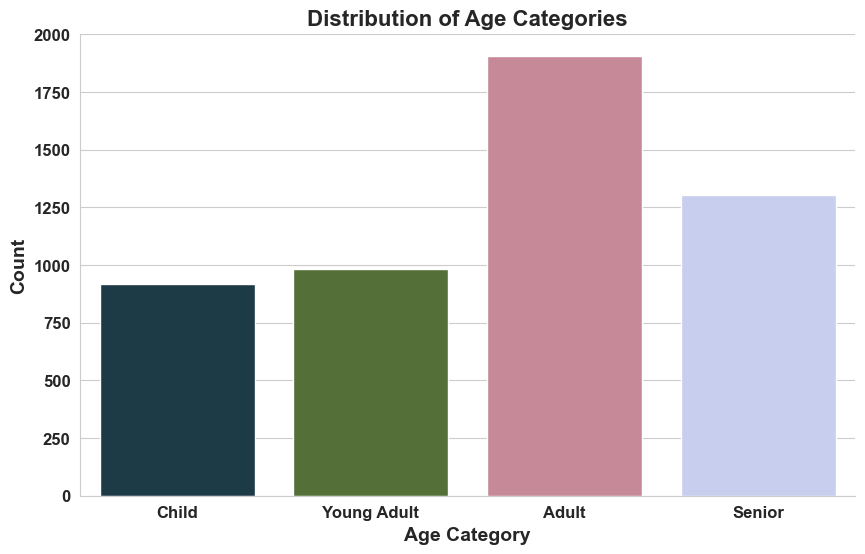

In [29]:

age_category_counts = df['age_category'].value_counts()

# Setting up the plot style
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_category_counts.index, y=age_category_counts.values, palette='cubehelix')

# Adding title and labels
plt.title('Distribution of Age Categories', fontsize=16, fontweight='bold')
plt.xlabel('Age Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


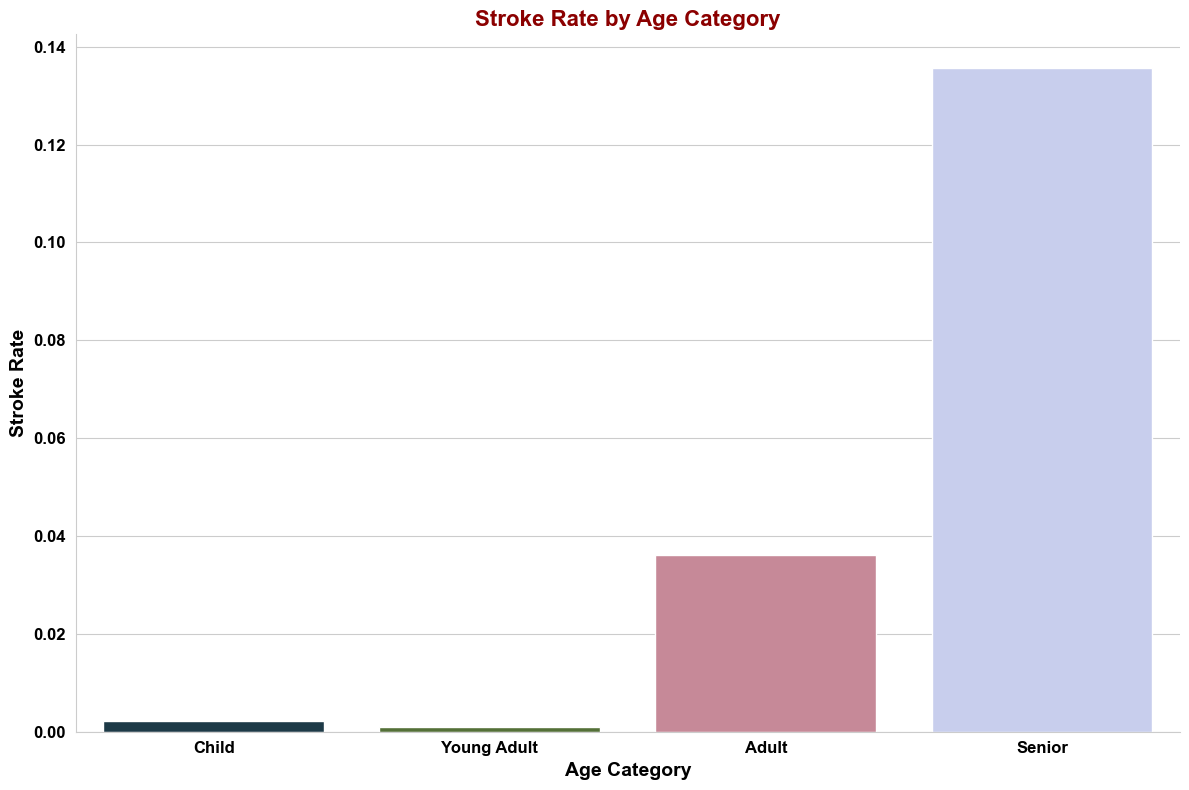

In [30]:

# Calculate the rate by age category
rate_data = df.groupby(['age_category', 'stroke']).size() / df.groupby('age_category').size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting the stroke rate by age category
bar_plot = sns.barplot(x='age_category', y='rate', data=stroke_rate_data, palette='cubehelix')

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate by Age Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Age Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Stroke Rate', fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout()  # Adjust the layout
plt.show()


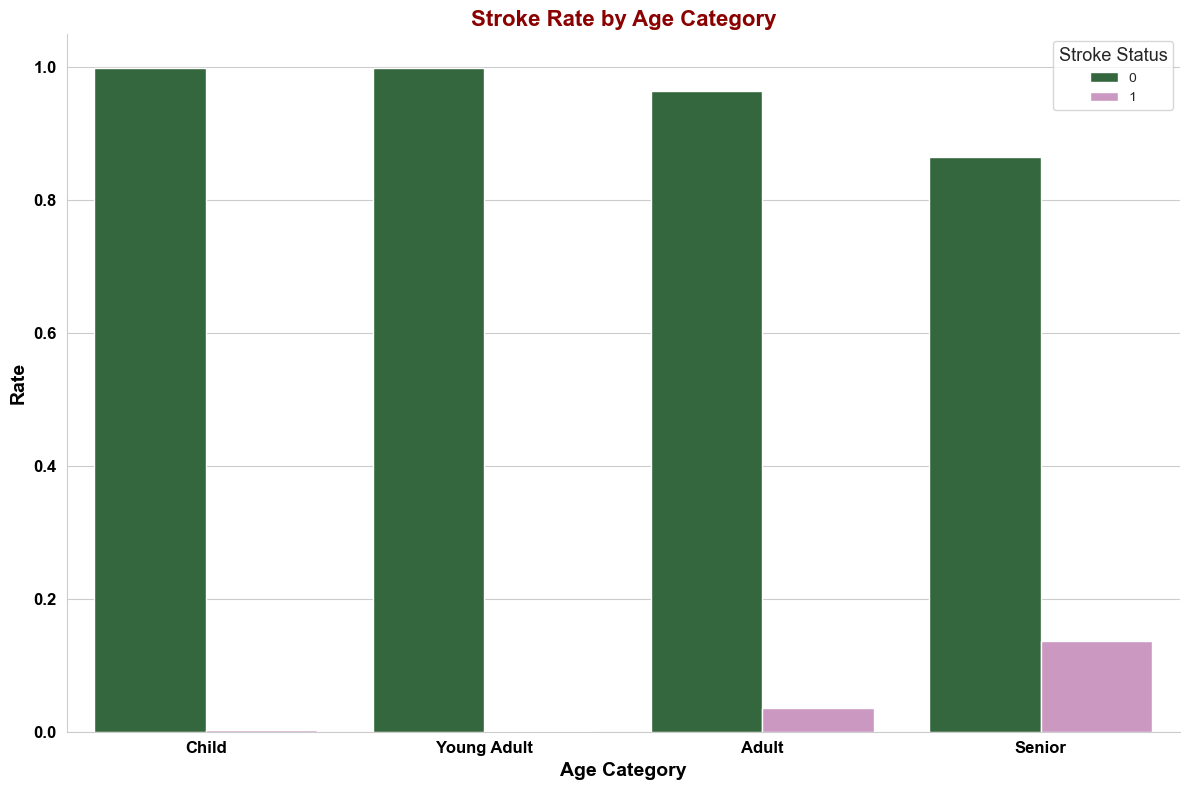

In [31]:

# Calculate the rate by age category and stroke status
rate_data = df.groupby(['age_category', 'stroke']).size() / df.groupby('age_category').size()
rate_data = rate_data.reset_index(name='rate')

# Setting up the plot style for minimalism
sns.set_style("whitegrid")  # White background with grid for a clean look
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Plotting the stroke rate by age category with stroke hue
bar_plot = sns.barplot(x='age_category', y='rate', hue='stroke', data=rate_data, palette='cubehelix')

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate by Age Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Age Category', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Rate', fontsize=14, fontweight='bold', color='black')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjusting the legend for minimalism
plt.legend(title='Stroke Status', loc='upper right', fontsize='medium', title_fontsize='13')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout()  # Adjust the layout
plt.show()


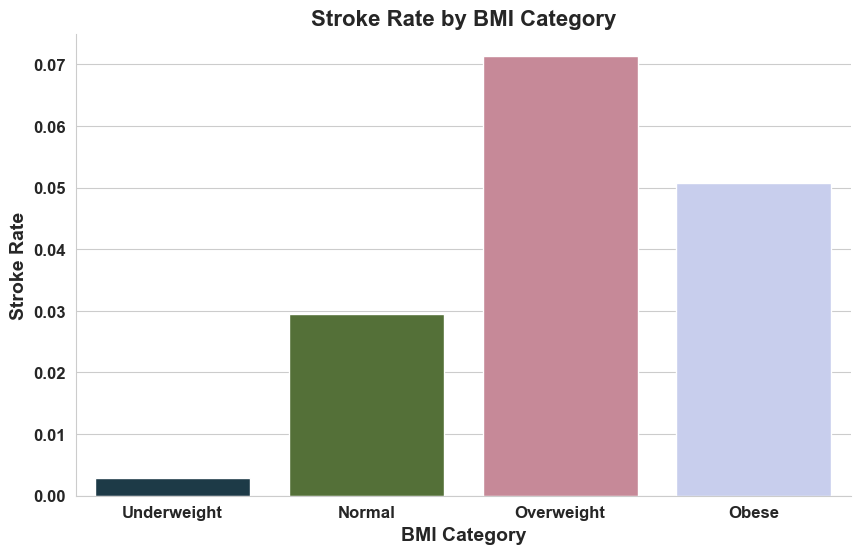

In [32]:
# Calculate the stroke rate per BMI category
rate_data = df.groupby(['bmi_category', 'stroke']).size() / df.groupby('bmi_category').size()
rate_data = rate_data.reset_index(name='rate')

# Filter for stroke cases only
stroke_rate_data = rate_data[rate_data['stroke'] == 1]

# Setting up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the stroke rate by BMI category
sns.barplot(x='bmi_category', y='rate', data=stroke_rate_data, palette='cubehelix')

# Adding title and labels
plt.title('Stroke Rate by BMI Category', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Stroke Rate', fontsize=14, fontweight='bold')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()

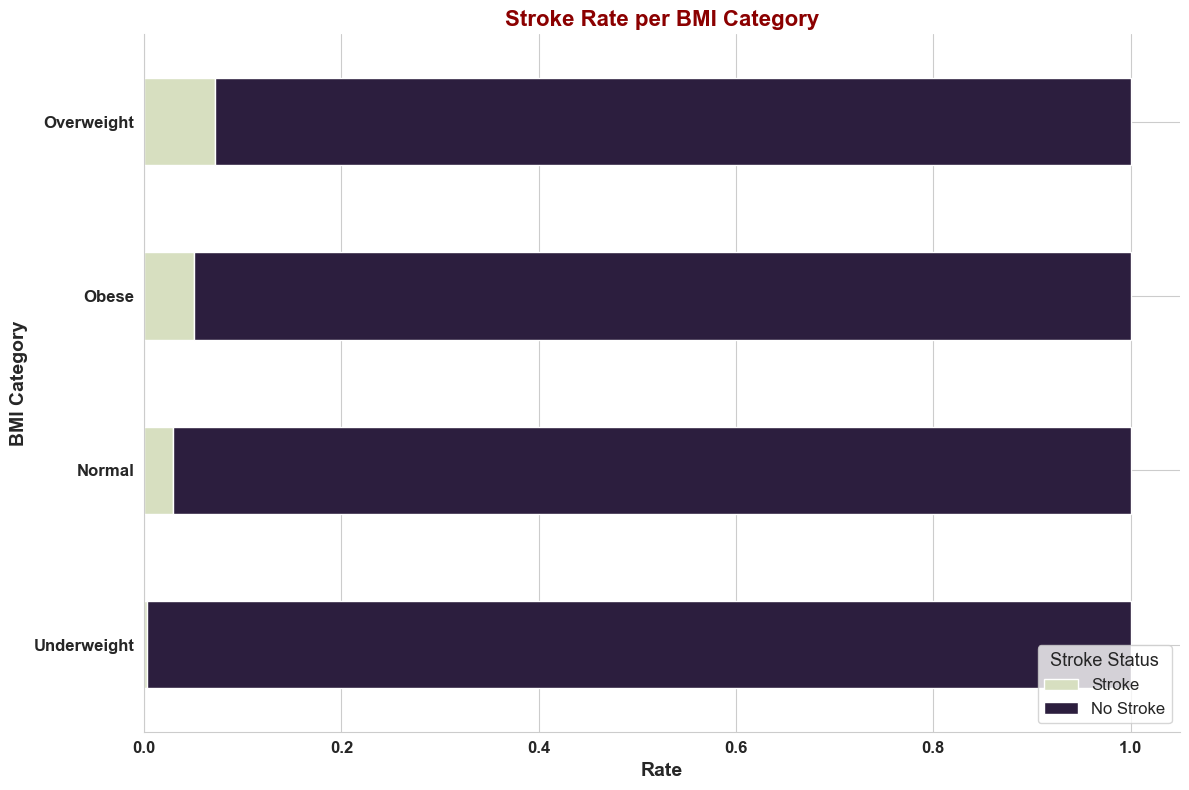

In [33]:

# Calculate the rate
rate_data = df.groupby(['bmi_category', 'stroke'])['stroke'].count() / df.groupby('bmi_category')['stroke'].count()

# Unstack and sort the data
sorted_data = rate_data.unstack().sort_values(by=1)[[1, 0]]

# Setting up the plot style and palette
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.set_style("whitegrid")  # Set the style of the plot
palette = sns.cubehelix_palette(2, start=.5, rot=-.75)  # Advanced color palette

# Plotting
sorted_data.plot(kind='barh', stacked=True, color=palette, ax=plt.gca())

# Adding title and labels with enhanced formatting
plt.title("Stroke Rate per BMI Category", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Rate', fontsize=14, fontweight='bold')
plt.ylabel('BMI Category', fontsize=14, fontweight='bold')

# Customizing the legend
plt.legend(title='Stroke Status', labels=['Stroke', 'No Stroke'], loc='lower right', fontsize='large', title_fontsize='13')

# Customizing the ticks for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Adjust the layout
plt.show()


In [34]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  missing bmi age_category glucose_category bmi_category  
0       1        False       Senior        Very High        Obese  
1       1         True       Senior        Very High   Overweight  
2       1        False       Senior           Normal        Obese  
3       1        False        Adult             High        Obese  
4       1        False       Senior             High       Normal

##### now for numeric data

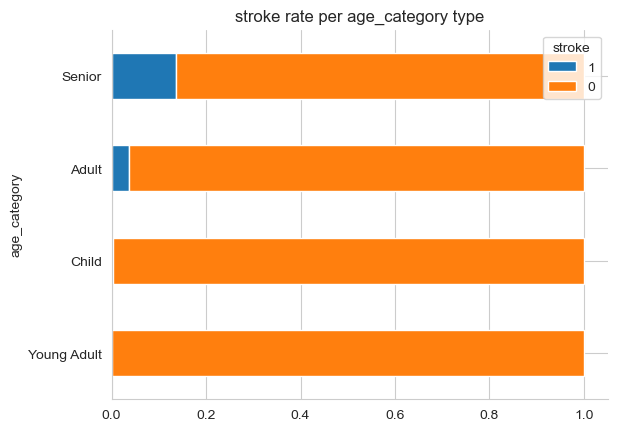

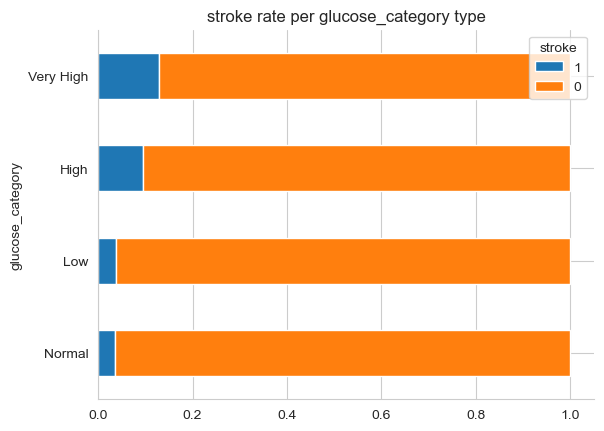

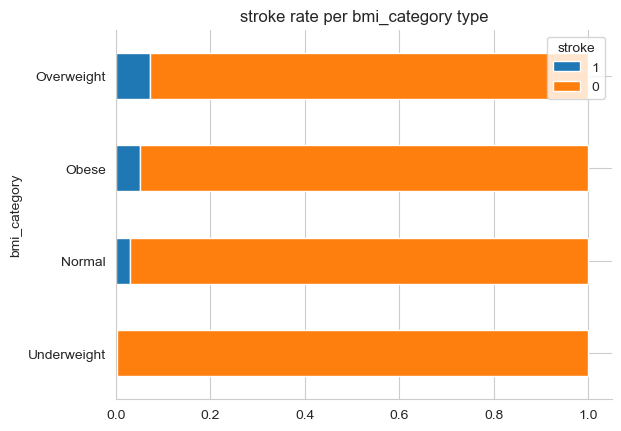

In [35]:
#  visaalization for columns with category data type
for col in df.select_dtypes('category').columns:
    rate_data = df.groupby([col,'stroke'])['stroke'].count() / df.groupby(col)['stroke'].count()
    
    rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
    plt.title(f"stroke rate per {col} type")
    sns.despine()
    plt.show()

Does marriage and glucose result in a higher incidence of stroke? Considering that children are typically unmarried, we will demonstrate analysis on adults and seniors to examine the stroke ratio in relation to marital status

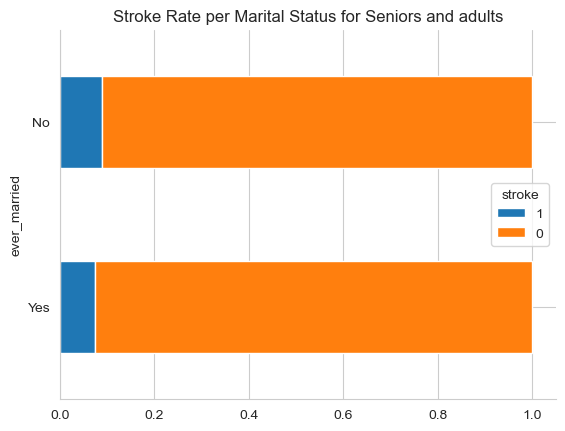

In [36]:
# Filter the DataFrame for seniors and adults
senior_df = df[df['age_category'].isin(['Senior', 'Adult'])]

# Calculate the rate
rate_data = senior_df.groupby(['ever_married', 'stroke'])['stroke'].count() / senior_df.groupby('ever_married')['stroke'].count()

# Unstack, sort, and plot
rate_data.unstack().sort_values(by=1)[[1, 0]].plot(kind='barh', stacked=True)
plt.title("Stroke Rate per Marital Status for Seniors and adults")
sns.despine()
plt.show()

As the visual analysis indicates, the ratio of stroke incidence among adults and seniors appears to be similar for both married and unmarried groups.

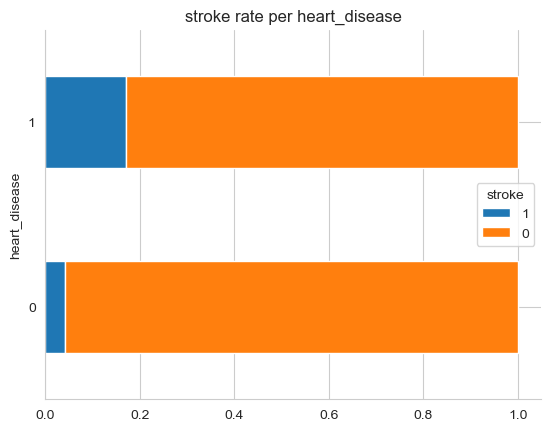

In [37]:
#visualization with numeric data type (heart disease)
rate_data = df.groupby(['heart_disease','stroke'])['stroke'].count() / df.groupby('heart_disease')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per heart_disease")
sns.despine()
plt.show()

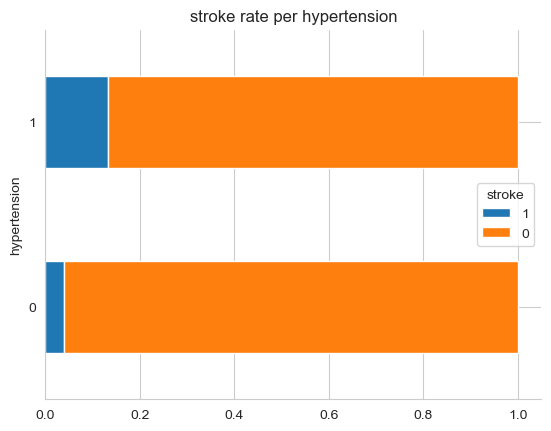

In [38]:
#visualization with numeric data type (hypertension)
rate_data = df.groupby(['hypertension','stroke'])['stroke'].count() / df.groupby('hypertension')['stroke'].count()
    
rate_data.unstack()[[1,0]].sort_values(1).plot(kind='barh',stacked=True)
plt.title(f"stroke rate per hypertension")
sns.despine()
plt.show()

###### Let's examine the relationship between glucose levels and the incidence of stroke. Does a higher glucose level correlate with an increased risk of stroke?

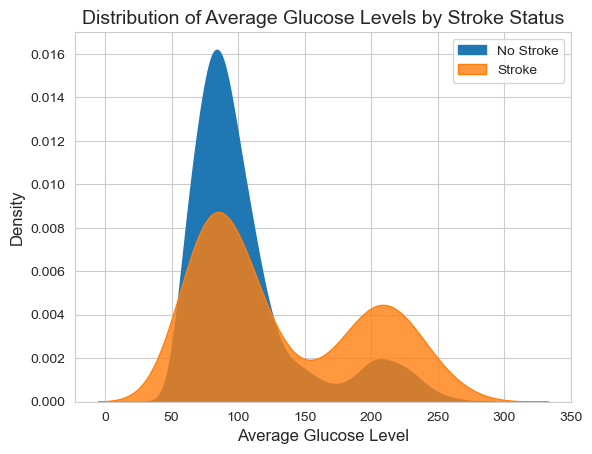

In [39]:
# Plotting the data
# 'No Stroke' group
sns.kdeplot(data=df[df['stroke'] == 0], x='avg_glucose_level', alpha=1,label='No Stroke',fill=True)
# 'Stroke' group
sns.kdeplot(data=df[df['stroke'] == 1], x='avg_glucose_level',  alpha=0.8, label='Stroke',fill=True)

# Setting the title and labels
plt.title('Distribution of Average Glucose Levels by Stroke Status', fontsize=14)
plt.xlabel('Average Glucose Level', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding a legend to show which color corresponds to which group
plt.legend()

# Display the plot
plt.show()


Glucose level distribution is skewed towards left and most of the strokes can be seen people with regular glucose levels. we can NOT conclude Glucose does not have significant impact on strokes, and its unclear strokes are which group effected by strokes.

avg_glucose_level : High blood glucose is found in stroke cases. A value of 126+ has been observed alot.

<Figure size 640x480 with 0 Axes>

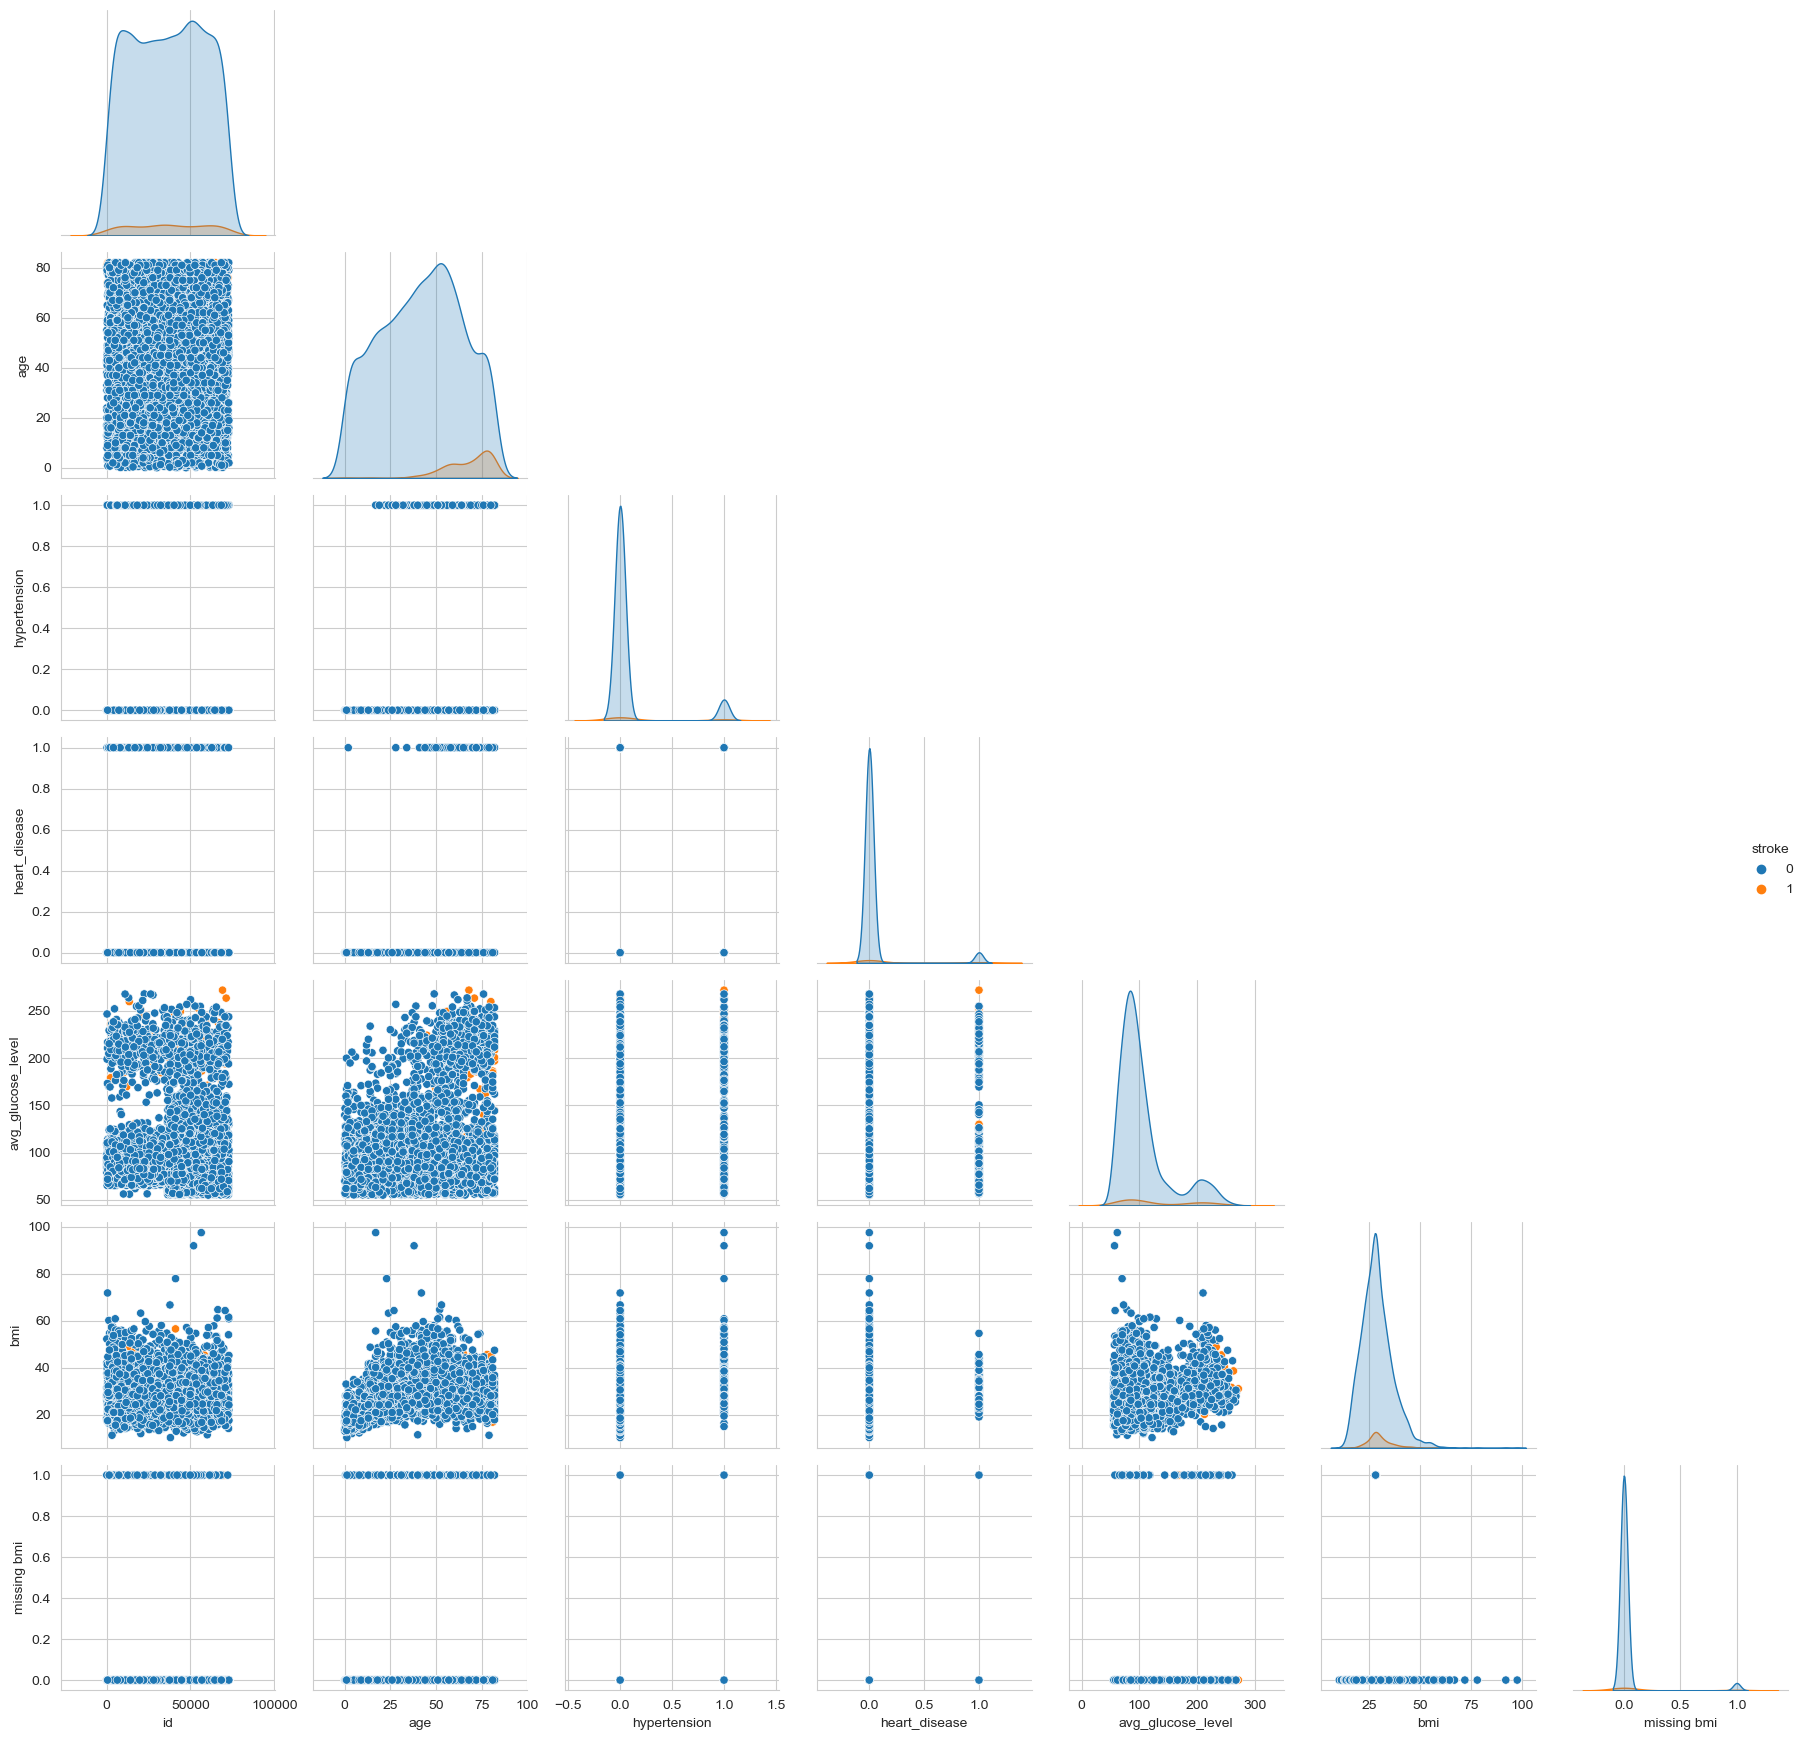

In [40]:
plt.figure()
sns.pairplot(df,hue="stroke", corner=True)
plt.tight_layout()
plt.show()

### dive into machine learning

In [41]:
df_copy=df.copy()
df_copy

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21  28.1     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75  28.1     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  missing bmi age_category glucose_category bmi_category  
0          1        False       Senior        Very High        Obese  
1          1         True       Senior        Very High   Overweight  
2          1        False       Senior           Normal        Obese  
3          1        False        Adult             High        Obese  
4          1        False       Senior             High       Normal  
...      ...          ...          ...              ...          ...  
5105       0         True       Senior              Low   Overweight  
5106       0        False       Senior           Normal        Obese  
5107       0        False  Young Adult              Low        Obese  
5108       0        False        Adult             High   Overweight  
5109       0        False        Adult              Low   Overweight  

[5110 rows x 16 columns]

In [42]:
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

In [43]:
df_copy.drop(columns = ['id'],inplace=True)

In [44]:
# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()


In [45]:
## label encoding of ordinal categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])

In [46]:
X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke'].copy()

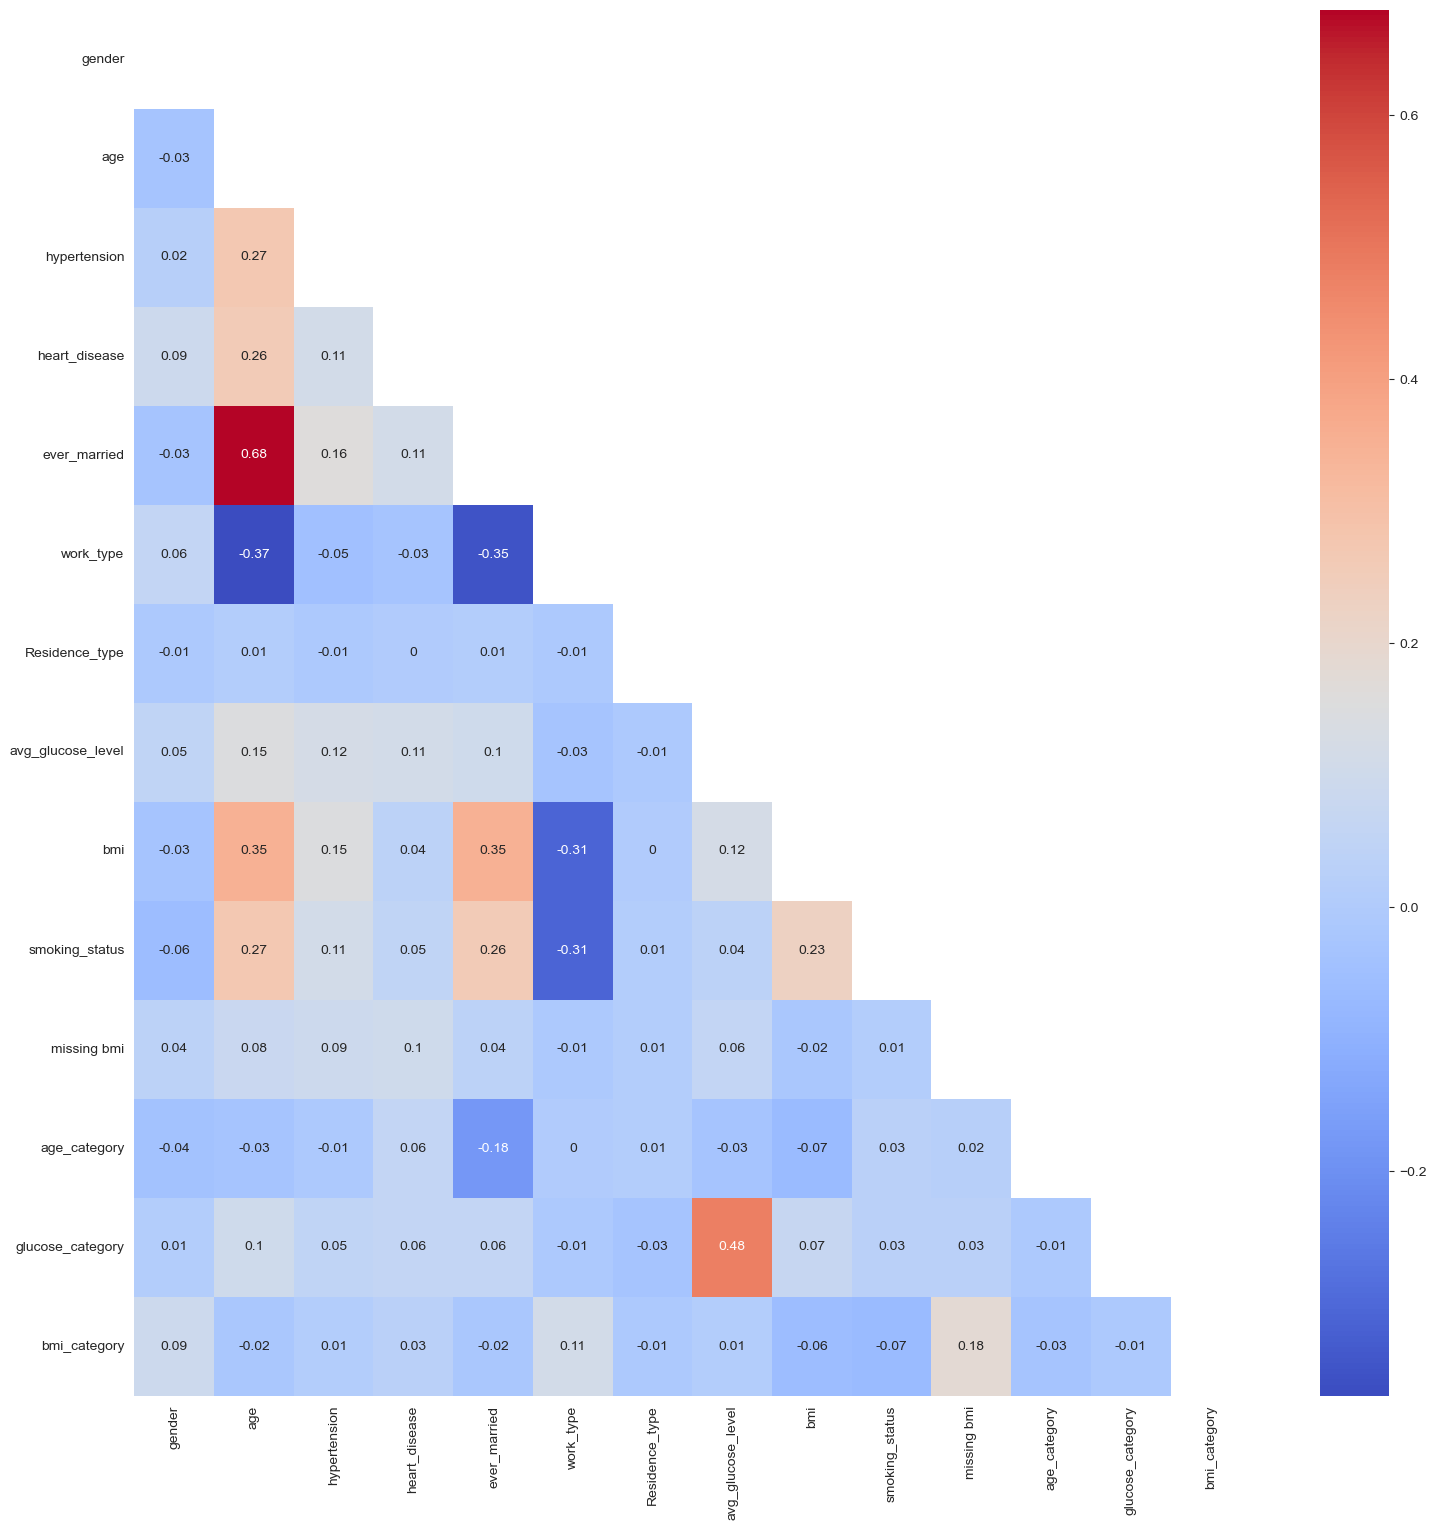

In [47]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

###### check same for standard scaler

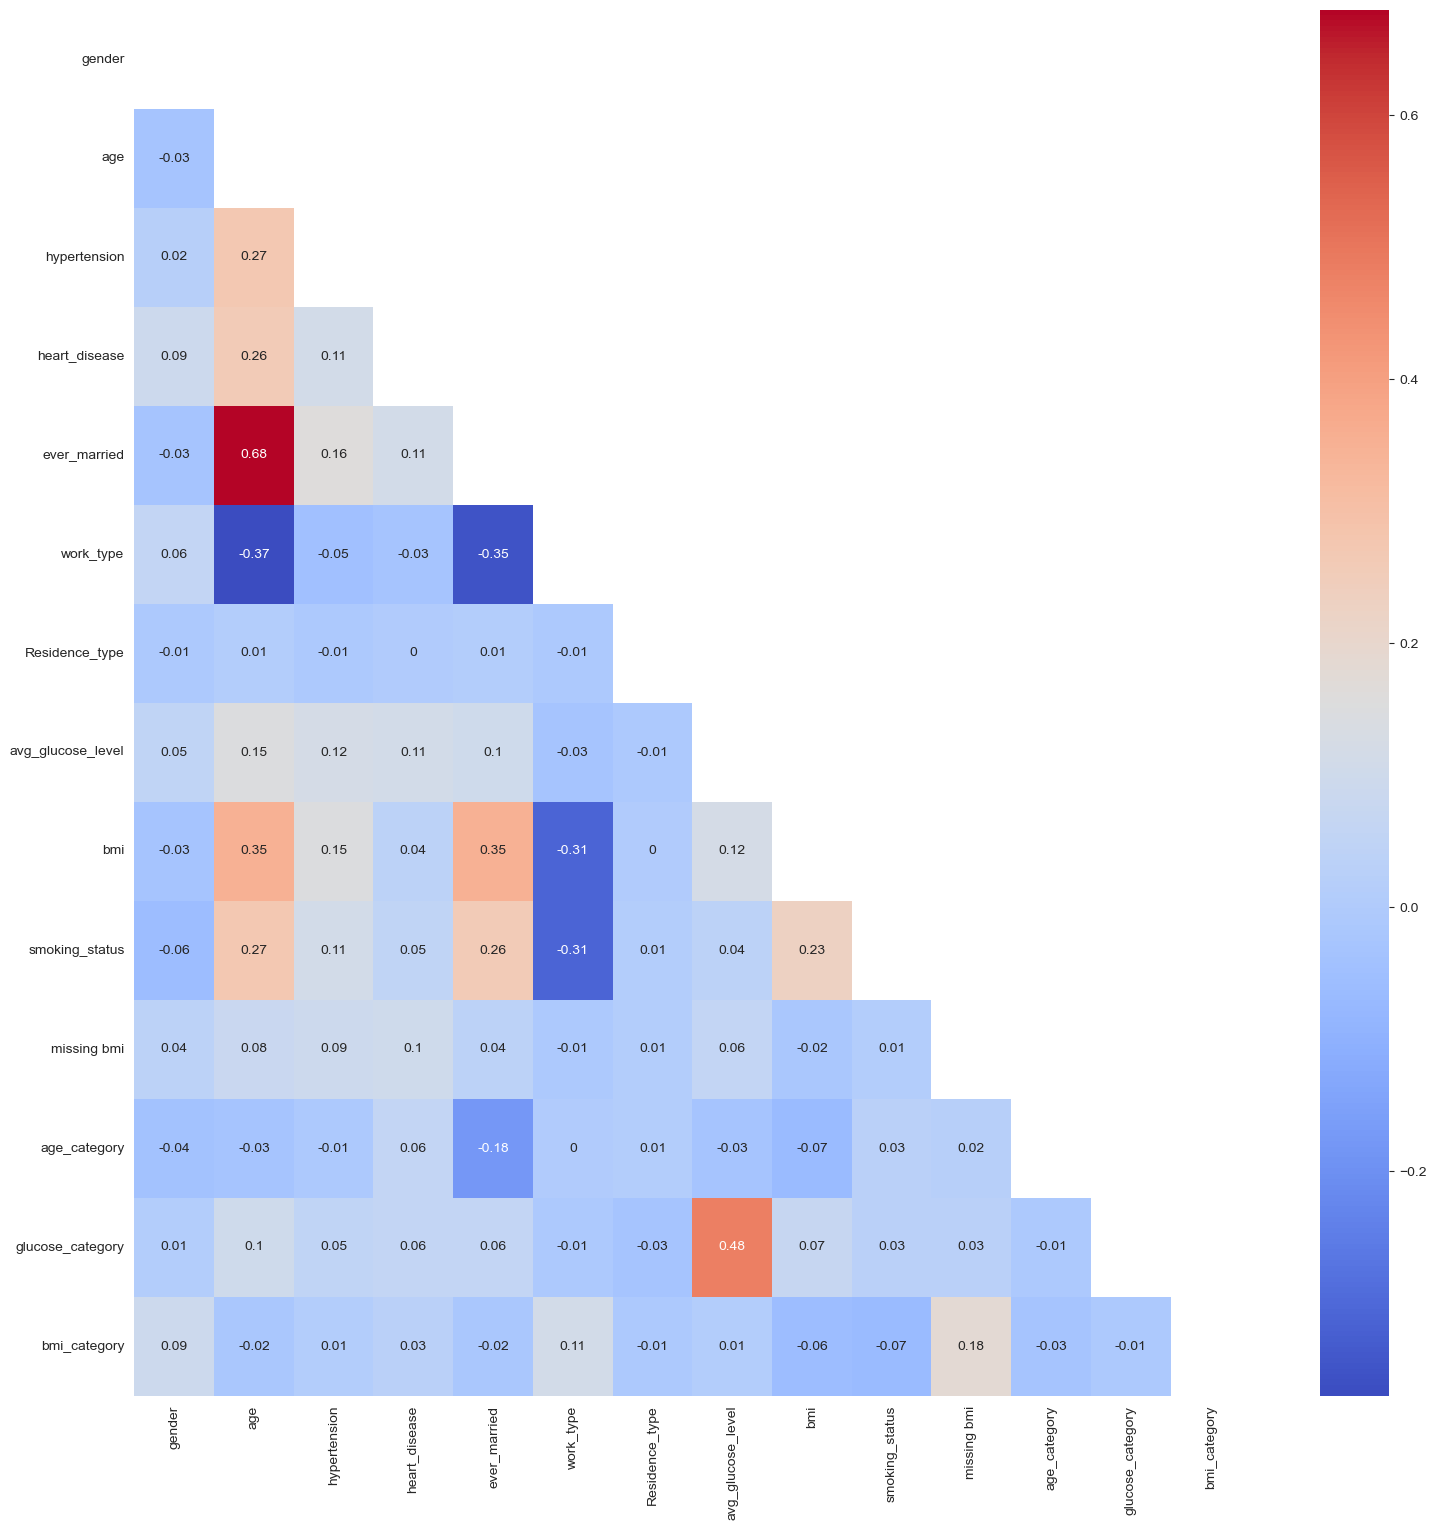

In [48]:
cols = df_copy.columns
## normalizing with standard scaler of numerical features
df_copy[cols] = ss.fit_transform(df_copy[cols])

X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke'].copy()

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [49]:
df_copy.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0  1.188073  1.039513     -0.328602       4.185032      0.723884  -0.153836   
1 -0.840344  0.779567     -0.328602      -0.238947      0.723884   0.763438   
2  1.188073  1.602729     -0.328602       4.185032      0.723884  -0.153836   
3 -0.840344  0.259675     -0.328602      -0.238947      0.723884  -0.153836   
4 -0.840344  1.559405      3.043196      -0.238947      0.723884   0.763438   

   Residence_type  avg_glucose_level       bmi  smoking_status    stroke  \
0        0.984080           1.780170  1.062020       -0.351781  4.418381   
1       -1.016178           1.543029 -0.092500        0.581552  4.418381   
2       -1.016178           0.542872  0.505134        0.581552  4.418381   
3        0.984080           1.359290  0.763203        1.514885  4.418381   
4       -1.016178           1.367436 -0.649386        0.581552  4.418381   

   missing bmi  age_category  glucose_category  bmi_category  
0    -0.202349      0.636614          2.036140     -0.230858  
1     4.941952      0.636614          2.036140      0.892652  
2    -0.202349      0.636614          0.711547     -0.230858  
3    -0.202349     -1.099760         -1.937638     -0.230858  
4    -0.202349      0.636614         -1.937638     -1.354368

In [50]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  missing bmi age_category glucose_category bmi_category  
0       1        False       Senior        Very High        Obese  
1       1         True       Senior        Very High   Overweight  
2       1        False       Senior           Normal        Obese  
3       1        False        Adult             High        Obese  
4       1        False       Senior             High       Normal

In [51]:
df_copy1 = df.copy()

### Now we can apply feature engineering on df_copy1

In [52]:
df_copy1.drop(columns = ['id'],inplace=True)

In [53]:
df_copy1.tail()

gender   age  hypertension  heart_disease ever_married      work_type  \
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
5105          Urban              83.75  28.1     never smoked       0   
5106          Urban             125.20  40.0     never smoked       0   
5107          Rural              82.99  30.6     never smoked       0   
5108          Rural             166.29  25.6  formerly smoked       0   
5109          Urban              85.28  26.2          Unknown       0   

      missing bmi age_category glucose_category bmi_category  
5105         True       Senior              Low   Overweight  
5106        False       Senior           Normal        Obese  
5107        False  Young Adult              Low        Obese  
5108        False        Adult             High   Overweight  
5109        False        Adult              Low   Overweight

In [54]:
df_copy1['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [55]:
df_copy1['gender'] = df_copy1['gender'].map({'Male': 1, 'Female': 0, 'Other' : 0})

In [56]:
df_copy1['bmi_category'].value_counts()

Obese          1893
Overweight     1610
Normal         1258
Underweight     349
Name: bmi_category, dtype: int64

In [57]:
df_copy1['bmi_category'] = df_copy1['bmi_category'].map({
    'Underweight' : 1,
    'Normal' : 2,
    'Overweight' : 3,
    'Obese' : 4
            })

In [58]:
df_copy1['glucose_category'].value_counts()

Low          2405
Normal       1884
Very High     434
High          387
Name: glucose_category, dtype: int64

In [59]:
df_copy1['glucose_category'] = df_copy1['glucose_category'].map({
'Low' : 1,
'Normal' : 2,
'High' : 3,
'Very High' : 4
})

In [60]:
df_copy1['age_category'].value_counts()

Adult          1907
Senior         1304
Young Adult     983
Child           916
Name: age_category, dtype: int64

In [61]:
df_copy1['age_category'] = df_copy1['age_category'].map({
'Senior' : 4, 
'Adult' : 3,
'Young Adult' : 2,
'Child' : 1
})

In [62]:
df_copy1['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [63]:
df_copy1['smoking_status'] = df_copy1['smoking_status'].map({
'never smoked' : 3,
'Unknown' : 4,
'formerly smoked' :1,
'smokes' : 2
})

In [64]:
df_copy1['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [65]:
df_copy1['Residence_type'] = df_copy1['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [66]:
df_copy1['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

5 category in work type, never worked and child better to be a category

In [67]:
df_copy1['work_type'] = df_copy1['work_type'].map({
'Private' : 1,
'Self-employed' : 2,
'children' : 3,
'Govt_job' : 4,
'Never_worked' : 3
})

In [68]:
df_copy1['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [69]:
df_copy1['ever_married'] = df_copy1['ever_married'].map({'Yes': 1, 'No': 0})

In [70]:
...

Ellipsis

In [71]:
df_copy1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
missing bmi          0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

<Figure size 640x480 with 0 Axes>

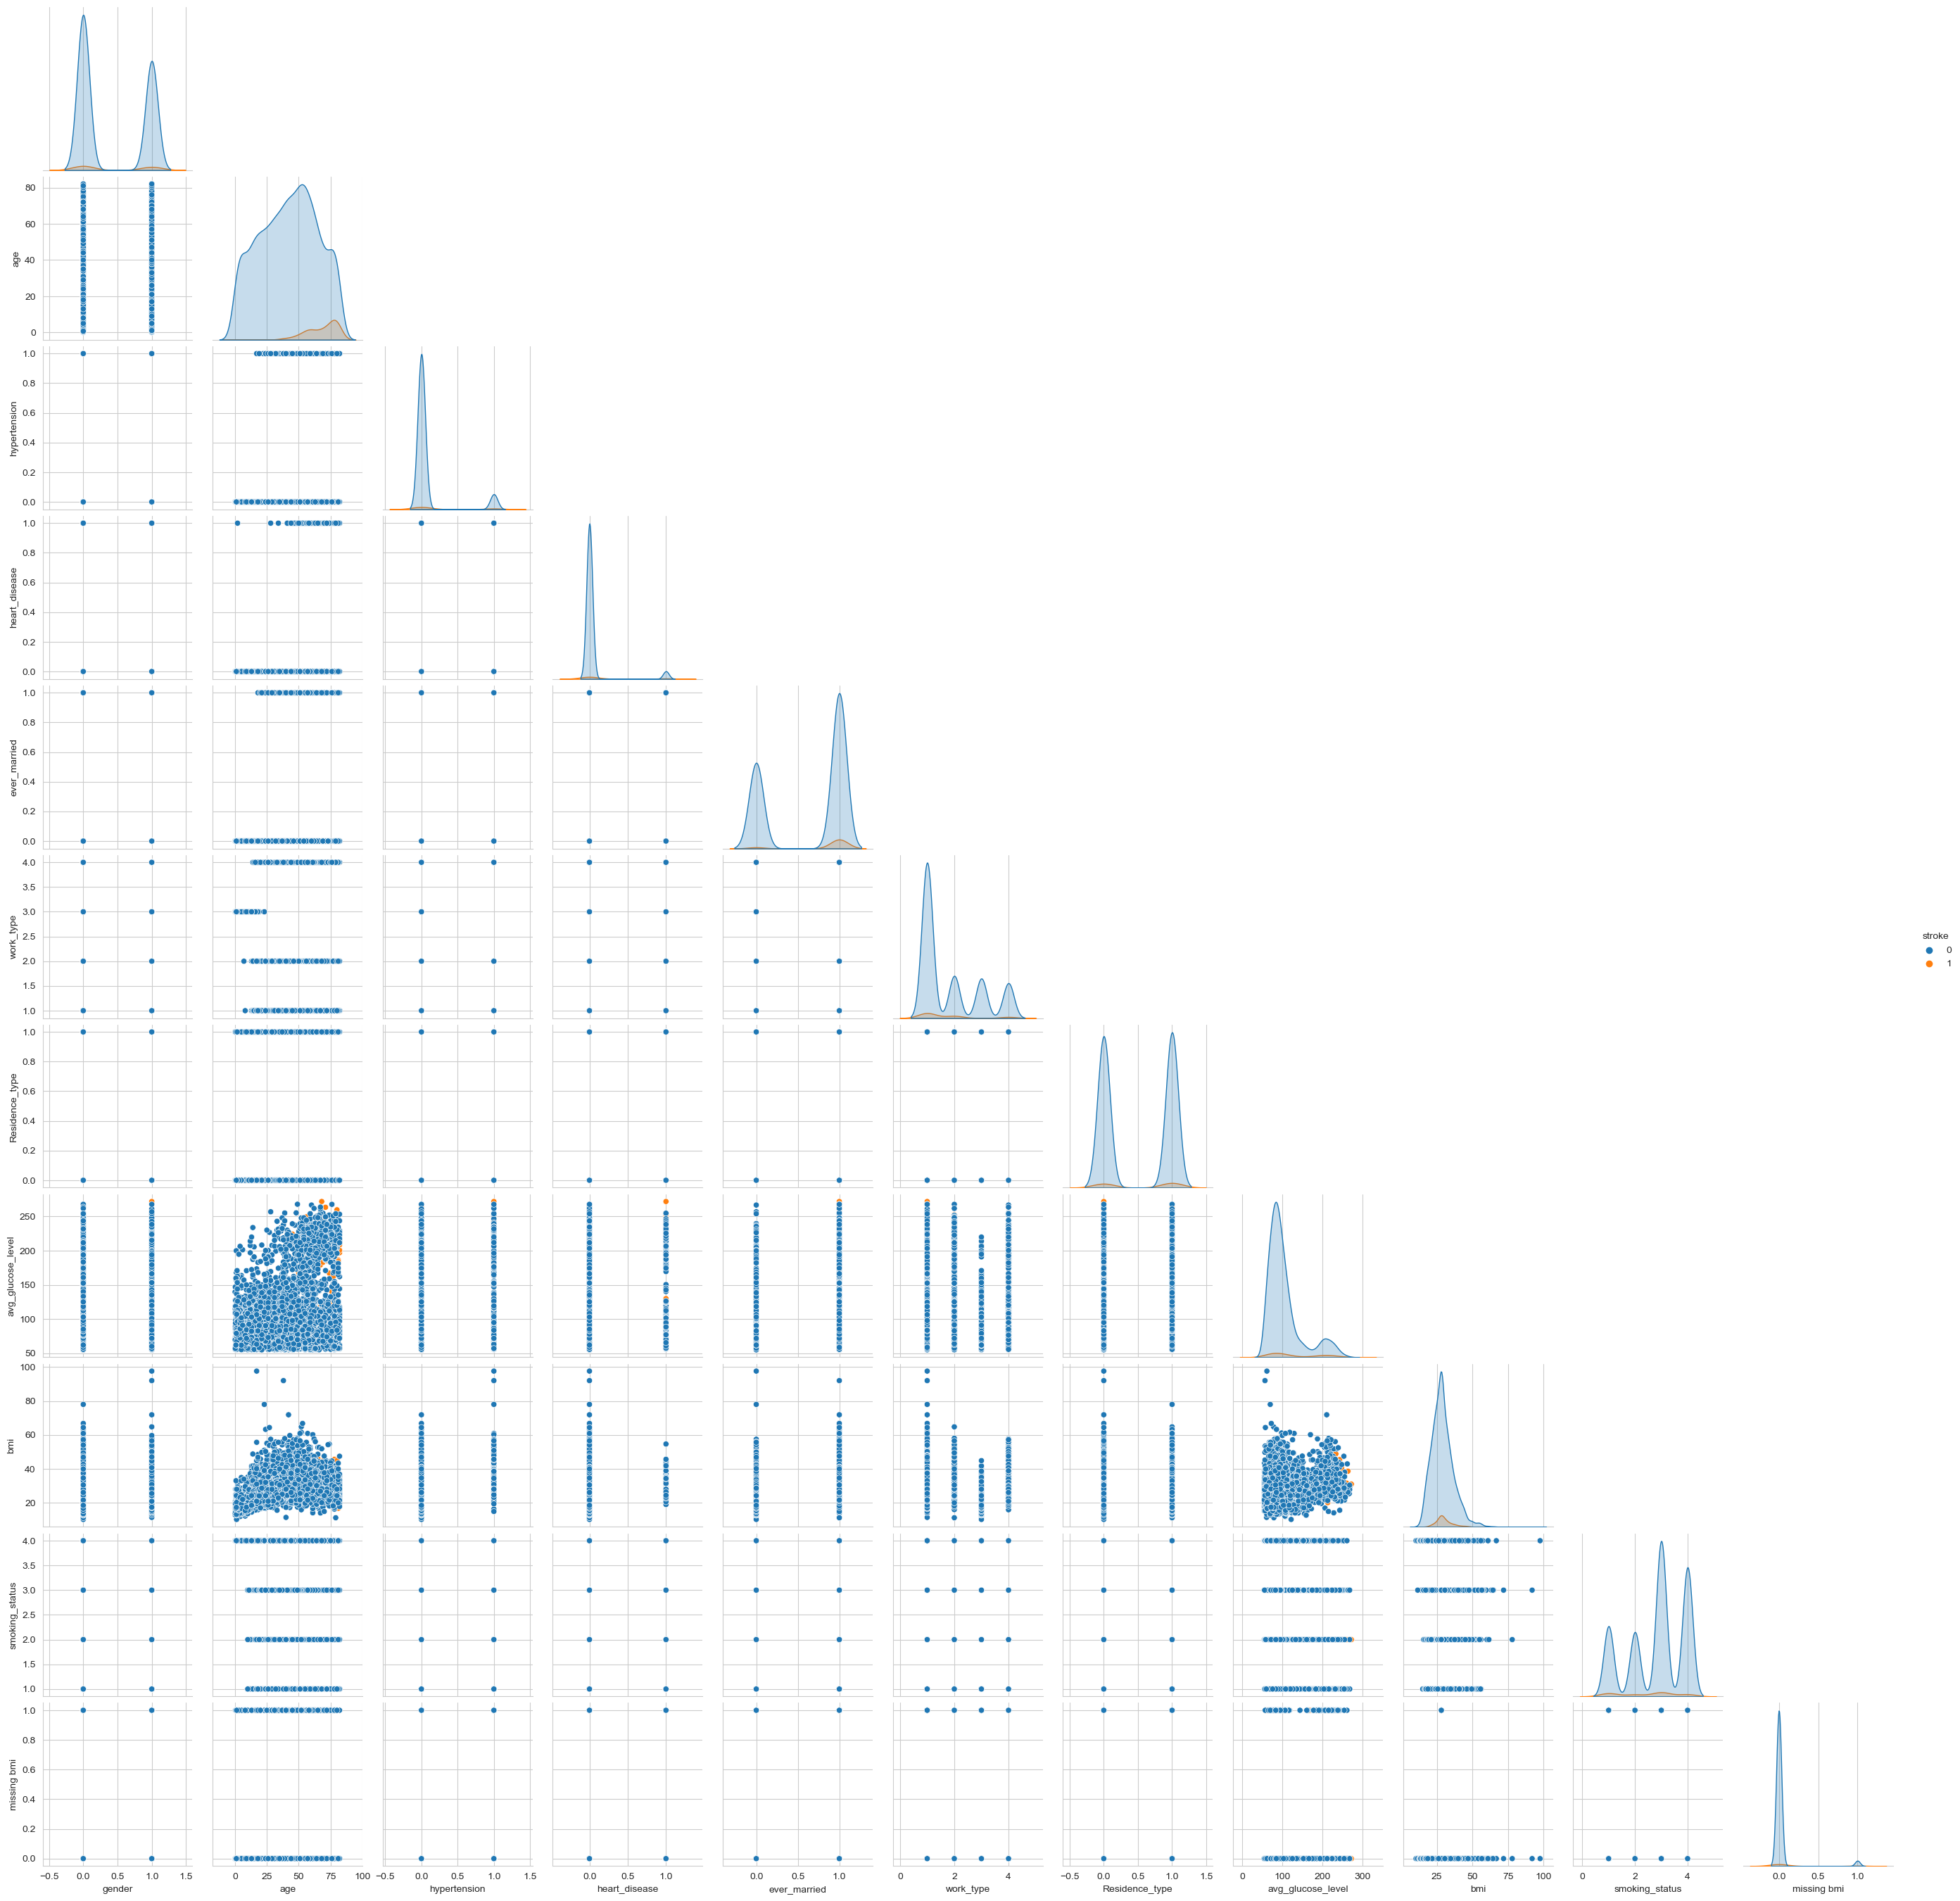

In [72]:
plt.figure()
sns.pairplot(df_copy1,hue="stroke", corner=True)
plt.show()

In [229]:
X = df_copy1.drop(columns=['stroke'])
y = df_copy1['stroke'].copy()

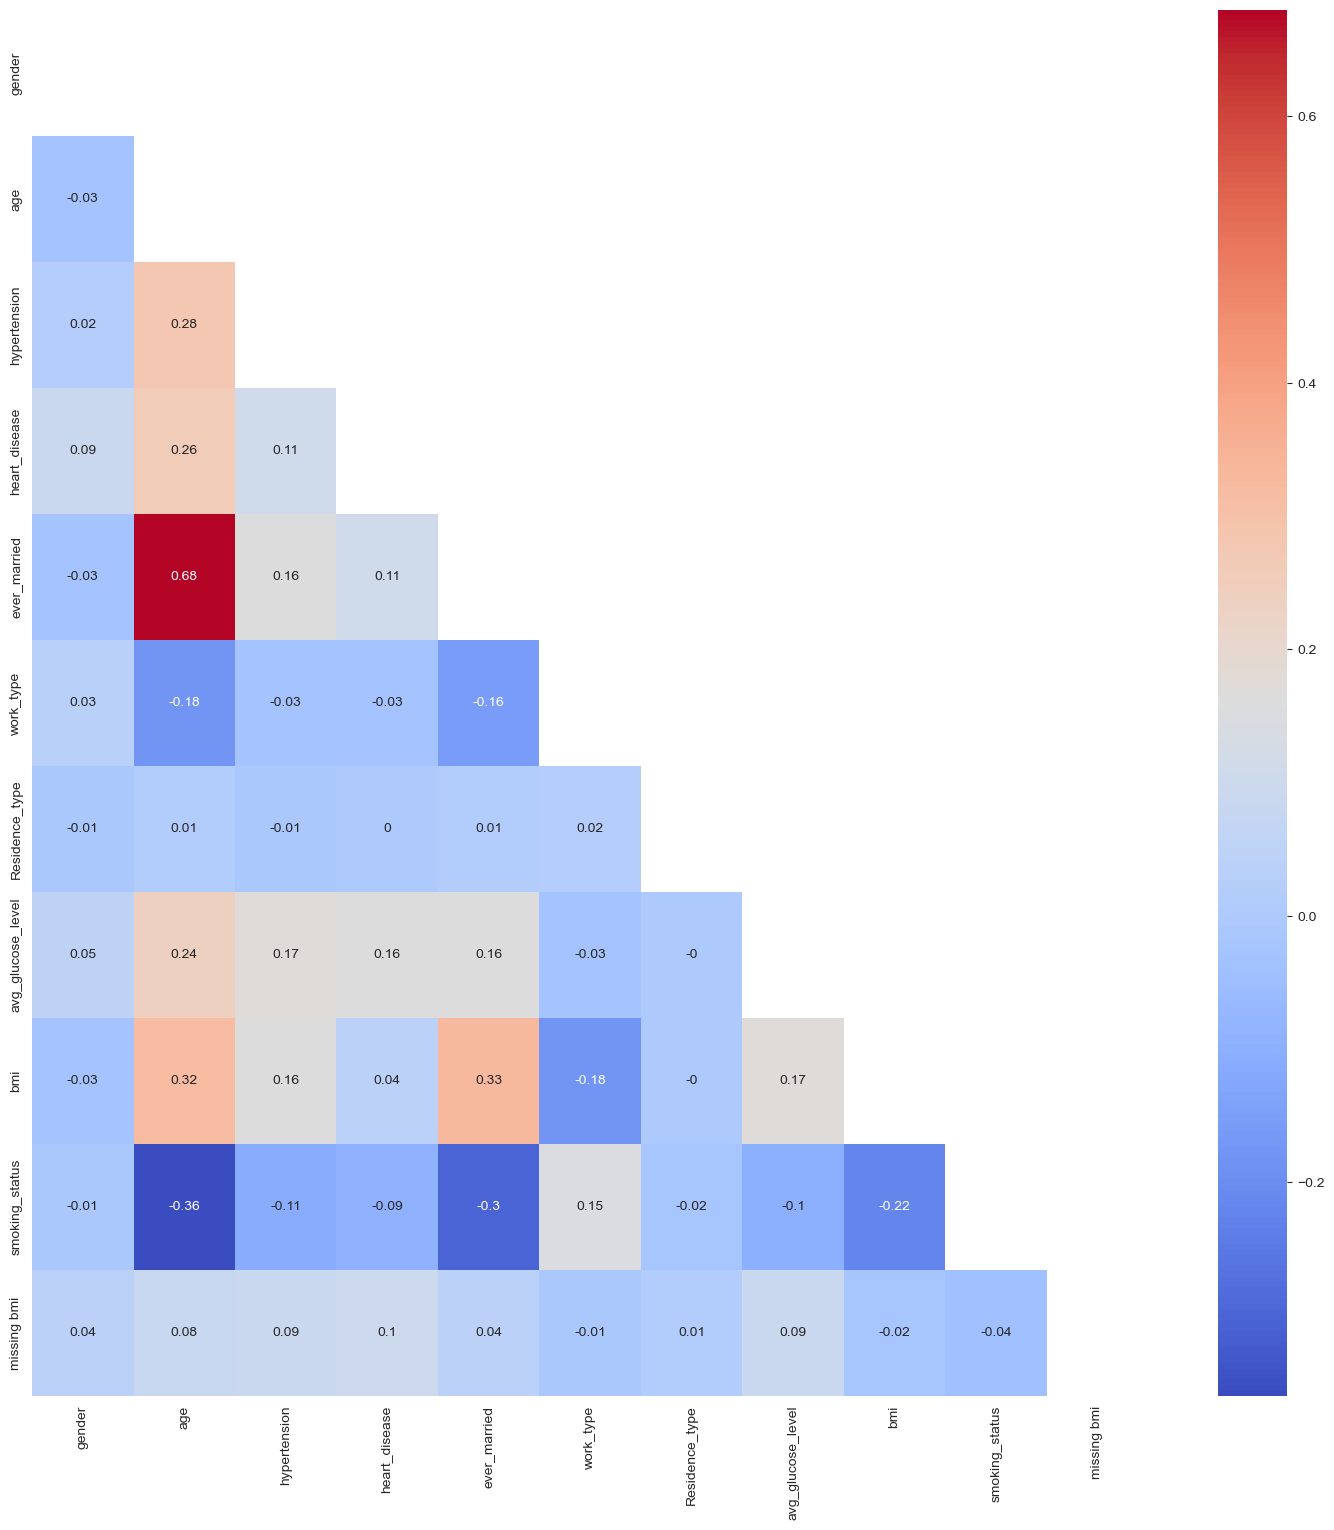

In [81]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [230]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12345,
                                                    stratify=y)

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4088, 14) (1022, 14) (4088,) (1022,)


In [232]:
cat_indices=['age_category','glucose_category','bmi_category']

In [233]:
cat_indices = ['age_category', 'glucose_category', 'bmi_category']
cat_indices = [X_train.columns.get_loc(col) for col in cat_indices]
print(cat_indices)

[11, 12, 13]


In [234]:
from imblearn.over_sampling import SMOTENC

# Assuming 'cat_indices' is the list of categorical feature indices
smote_nc = SMOTENC(categorical_features=cat_indices, random_state=0)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)


In [235]:
# Print the shape of X_train to see the number of features
print(X_train.shape)  


(7778, 14)


In [236]:
# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7778, 14) (1022, 14) (7778,) (1022,)


In [238]:
#X_train.drop(columns=['age_category','glucose_category','bmi_category'],inplace=True)
#X_test.drop(columns=['age_category','glucose_category','bmi_category'],inplace=True)

In [237]:
X_train.isna().sum()   

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
missing bmi          0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

In [90]:
X_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  80.0             0              0             0          2   
1       0  80.0             1              0             0          1   
2       1  70.0             1              0             1          2   
3       0  24.0             0              0             0          1   
4       0  72.0             0              0             1          4   

   Residence_type  avg_glucose_level   bmi  smoking_status  missing bmi  
0               0             204.17  41.3               1        False  
1               1              66.03  35.4               3        False  
2               1             251.60  27.1               3        False  
3               1              65.44  23.6               3        False  
4               0             118.22  21.9               1        False

In [ ]:
#X_train.drop(columns=['age','avg_glucose_level','bmi'],inplace=True)
X_test.drop(columns=['age','avg_glucose_level','bmi'],inplace=True)

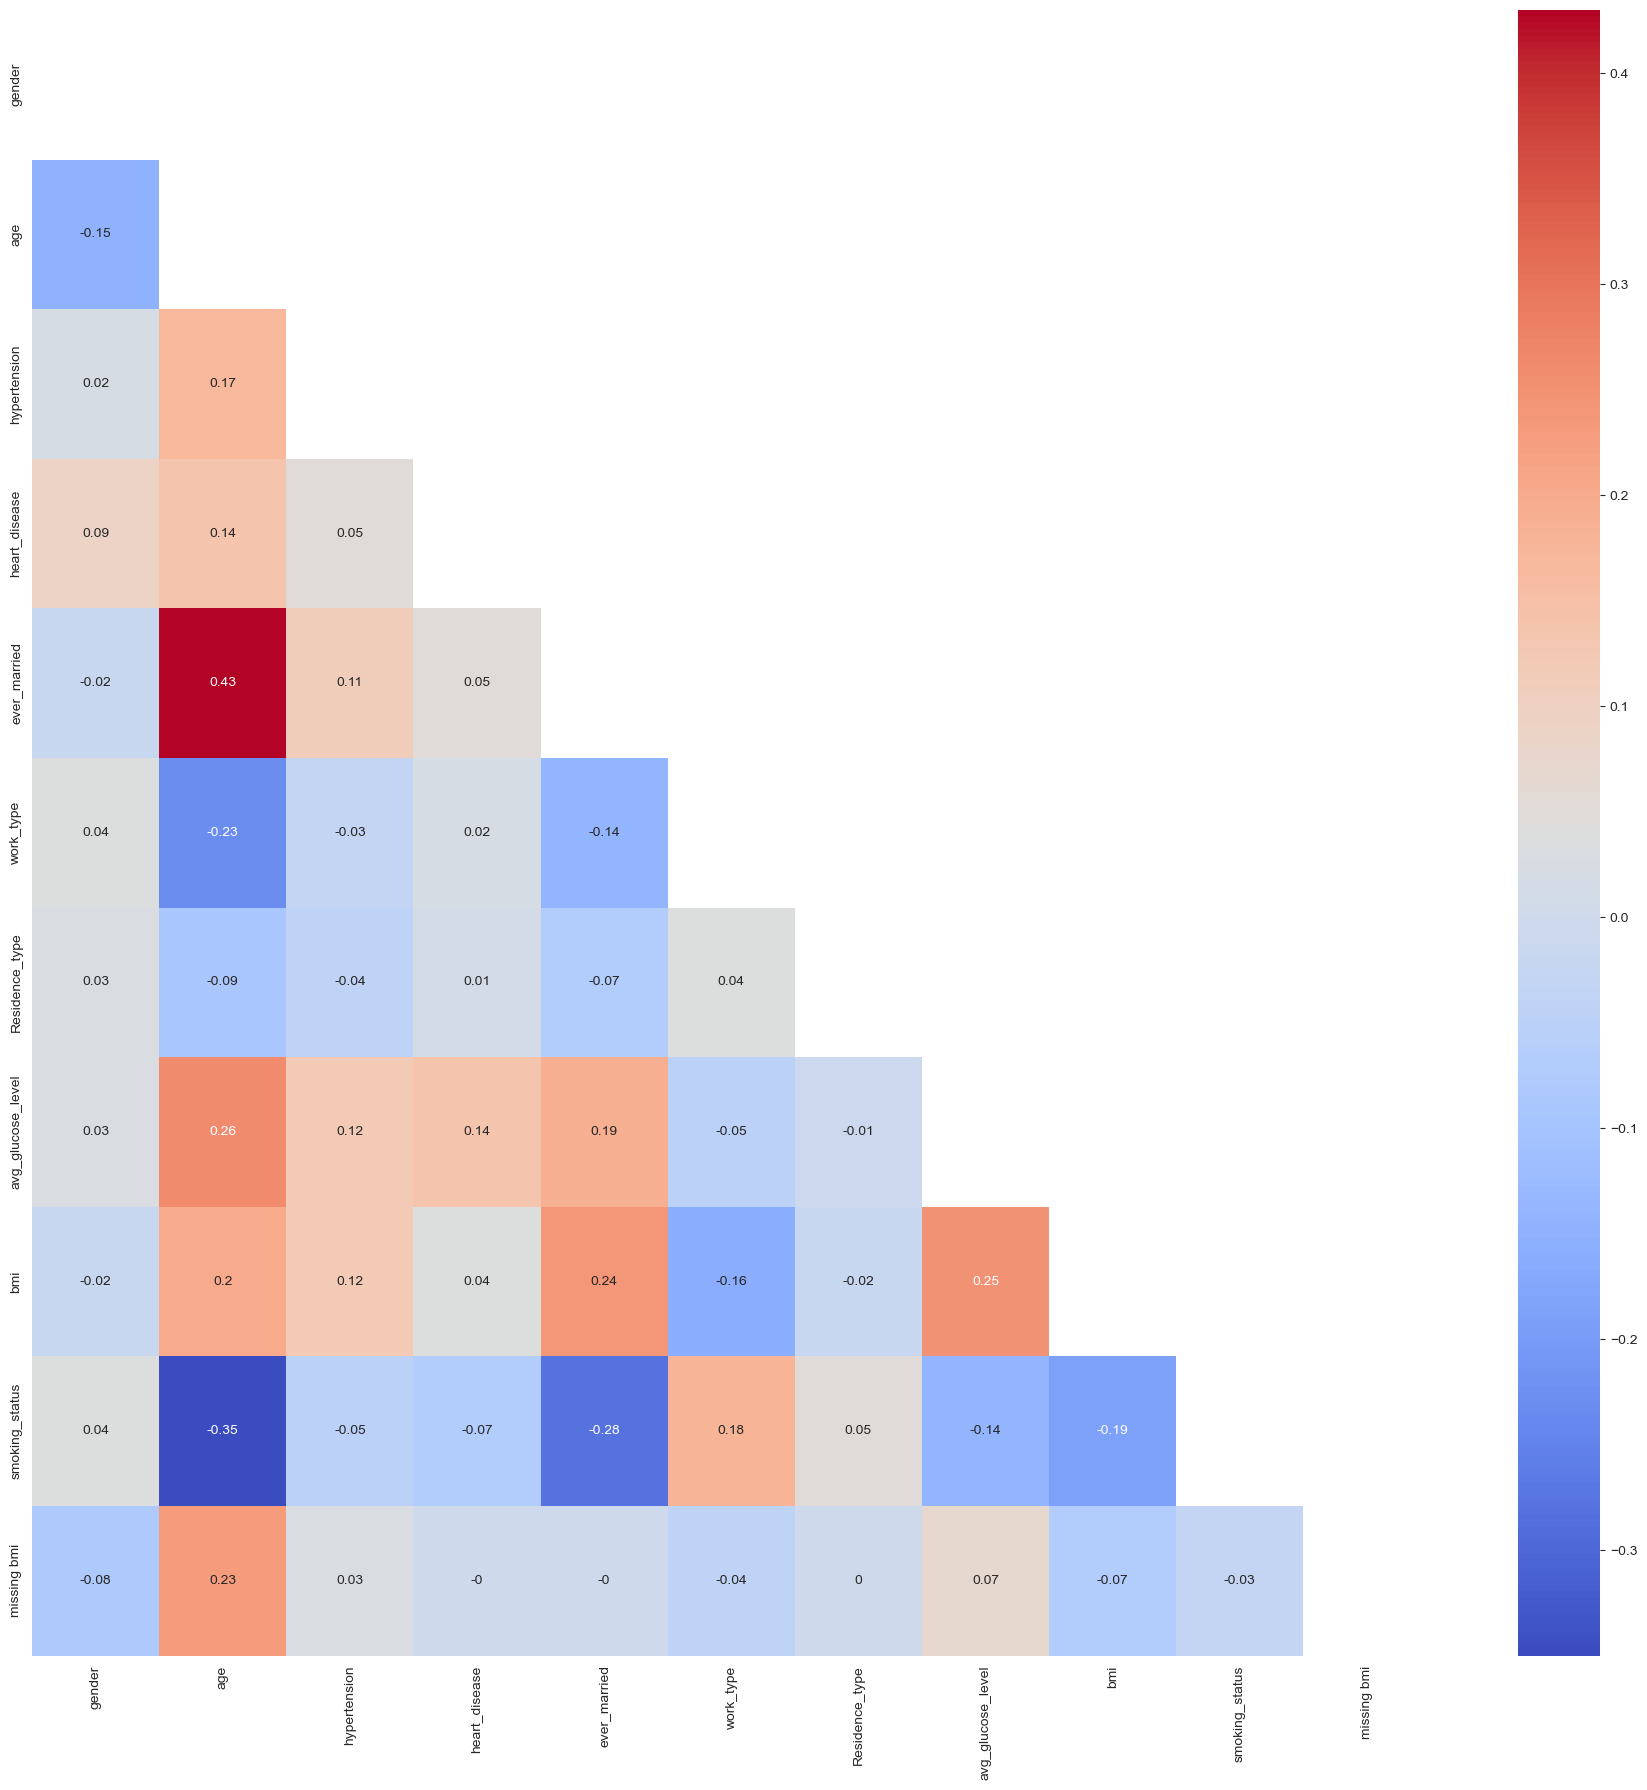

In [91]:
corr_df = X_train.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_df.round(2), mask=mask, cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [246]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [247]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7778, 11) (1022, 11) (7778,) (1022,)


In [94]:
import time

In [95]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train, y_train)

    # Score the model
    train_acc_ss.append(logit.score(X_train, y_train))
    test_acc_ss.append(logit.score(X_test, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.21 seconds


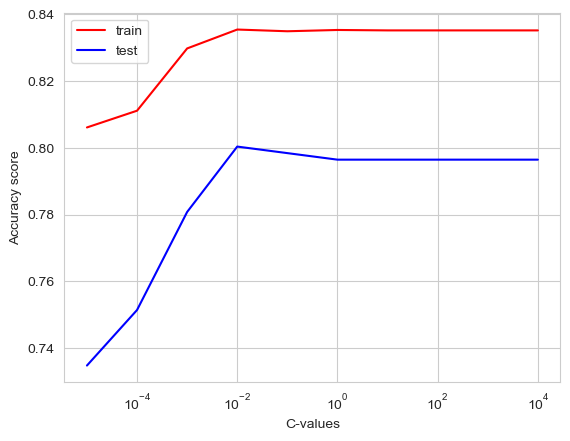

In [96]:

# Plotting the train and test scores for every C value
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

In this instance, our best Logistic Regression model was at C equal to 0.001 We can see clearly the tell-tale elbow which indicates the bulk of learning has been completed and a point beyond which overfitting might be a concern. Let's take a look at the model's performance:

In [97]:
# The Logistic Regression that performed the best on the standardized data
# Instantiate the model
logit_ss = LogisticRegression(C=0.001, random_state=42)

# Fit the model
logit_ss.fit(X_train, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train, y_train)
logit_ss_test = logit_ss.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.8297762921059398
Test Accuracy: 0.7808219178082192


In [98]:
from sklearn.metrics import classification_report
y_test_pred_logit_ss = logit_ss.predict(X_test) 

report_initial = classification_report(y_test, y_test_pred_logit_ss)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.58      0.21        50

    accuracy                           0.78      1022
   macro avg       0.55      0.69      0.54      1022
weighted avg       0.93      0.78      0.84      1022



##### Roc curve

In [99]:
from sklearn.metrics import roc_curve

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score



In [101]:
def false_positive_rate(y_true, y_pred):
    
    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)
    
    return FPR

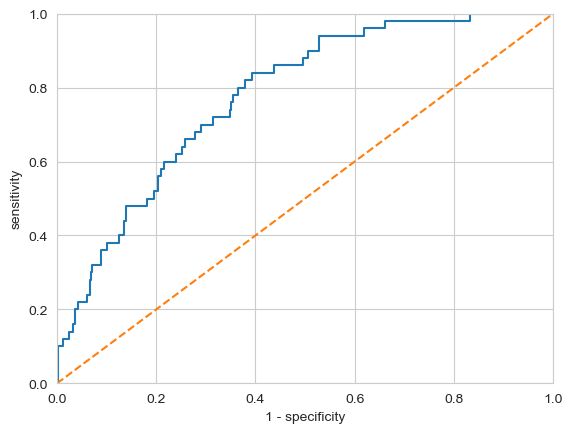

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [103]:
# Regenerate scores
y_proba = logit_ss.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

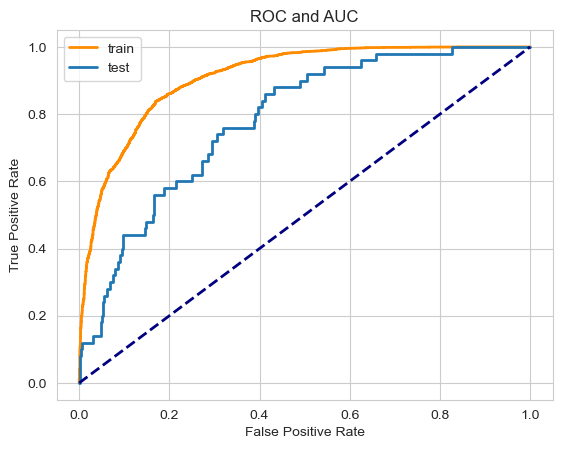

Test AUC score: 0.7834979423868313
Train AUC score: 0.9107461419259748


In [104]:
#Get the probability for each point in the train set.
y_proba_train = logit_ss.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for for the one class
fprs_train, tprs_train, thresholds_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

# Plot the ROC curve.
plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange', lw=2, label='train')
plt.plot(fprs, tprs, lw=2, label='test')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print(f"Test AUC score: {roc_auc}")
print(f"Train AUC score: {roc_auc_train}")

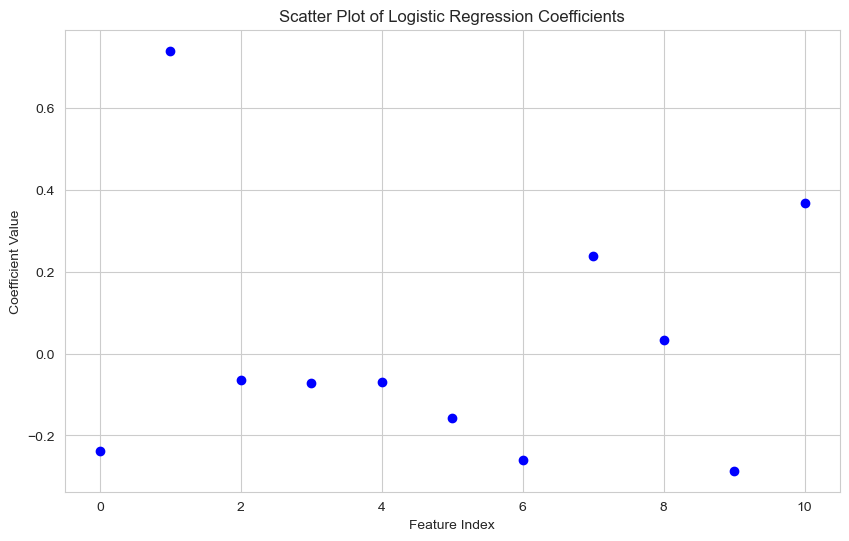

In [105]:
# Assuming logistic_regression_model is your trained logistic regression model
coefficients = logit_ss.coef_[0]  # Extracting the coefficients

# Creating an index for each coefficient
feature_index = np.arange(len(coefficients))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(feature_index, coefficients, color='blue')
plt.title('Scatter Plot of Logistic Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

### as above we can see the most effective feature is age

In [106]:
coefficients

array([-0.2391074 ,  0.73949913, -0.06454229, -0.07227451, -0.06958533,
       -0.15683266, -0.25891618,  0.23920734,  0.03380217, -0.28621618,
        0.36786948])

In [107]:
logit_ss.coef_

array([[-0.2391074 ,  0.73949913, -0.06454229, -0.07227451, -0.06958533,
        -0.15683266, -0.25891618,  0.23920734,  0.03380217, -0.28621618,
         0.36786948]])

In [108]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_logit_ss = logit_ss.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA



report_initial = classification_report(y_test, y_test_pred_logit_ss)
print(report_initial)


0    972
1     50
Name: stroke, dtype: int64

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.58      0.21        50

    accuracy                           0.78      1022
   macro avg       0.55      0.69      0.54      1022
weighted avg       0.93      0.78      0.84      1022



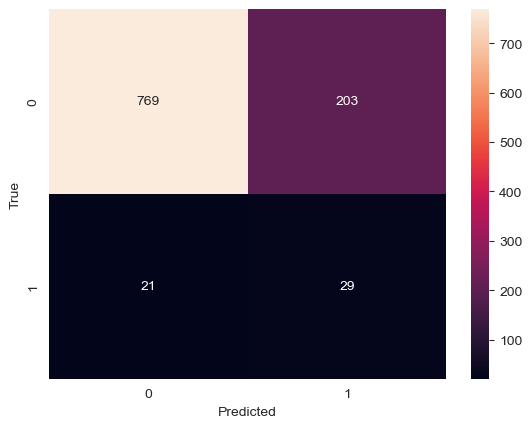

In [109]:
# Compute confusion matrix
conf_matrix_logit_ss = confusion_matrix(y_test, y_test_pred_logit_ss)

# Plot confusion matrix
sns.heatmap(conf_matrix_logit_ss, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [110]:
df_copy1.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       0  61.0             0              0             1          2   
2       1  80.0             0              1             1          1   
3       0  49.0             0              0             1          1   
4       0  79.0             1              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  \
0               1             228.69  36.6               1       1   
1               0             202.21  28.1               3       1   
2               0             105.92  32.5               3       1   
3               1             171.23  34.4               2       1   
4               0             174.12  24.0               3       1   

   missing bmi age_category glucose_category bmi_category  
0        False            4                4            4  
1         True            4                4            3  
2        False            4                2            4  
3        False            3                3            4  
4        False            4                3            2

### KNN

In [326]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 55, 2)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train, y_train)

    # Score the model
    train_acc_mm.append(knn.score(X_train, y_train))
    test_acc_mm.append(knn.score(X_test, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 26.12 seconds


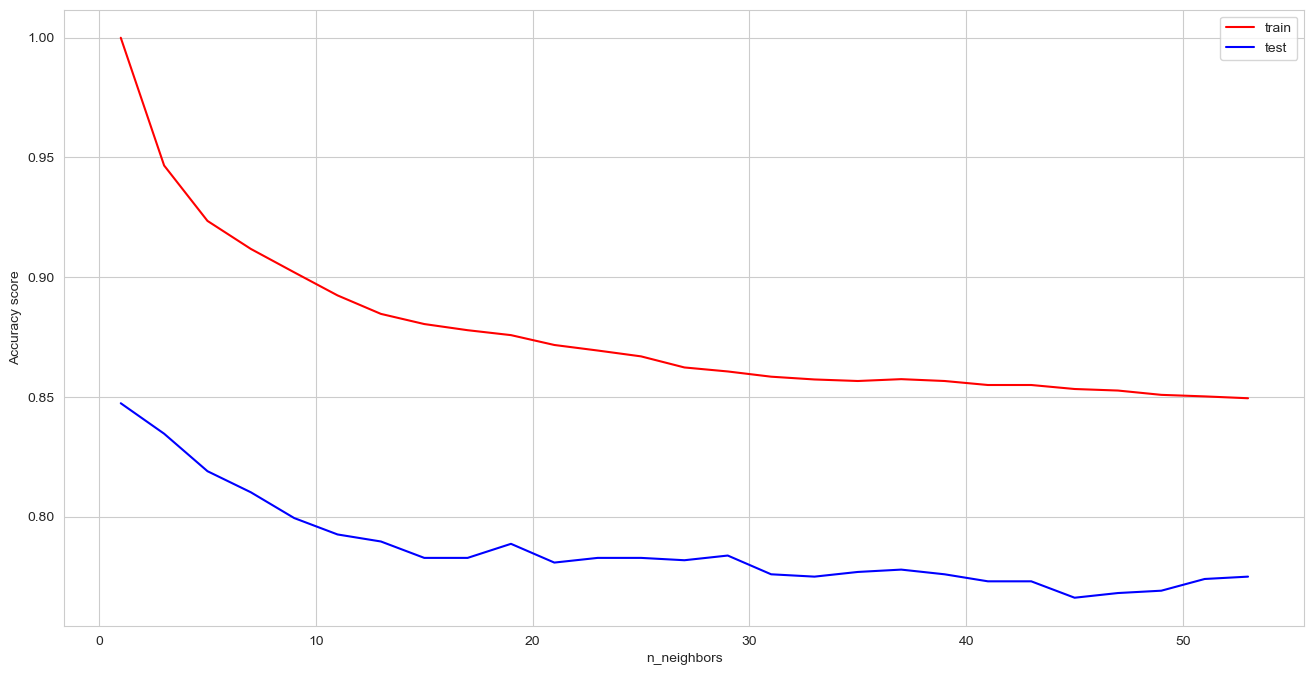

In [327]:
# Plot the accuracies
plt.figure(figsize=(16,8))
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

These plots are quite choppy so conclusions will be somewhat subjective. However, the gap between the two plots is at its narrowest at around n_neighbors = 7 and 19

In [328]:
# KNN with n_neighbors=7
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=7)

# Fit the model
knn_mm.fit(X_train, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train, y_train)
knn_mm_test = knn_mm.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.9118025199280021
Test Accuracy: 0.8101761252446184


In [329]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_knn_mmk7 = knn_mm.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA



print(f'Recall score: {recall_score(y_test, y_test_pred_knn_mmk7)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_knn_mmk7)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_knn_mmk7)*100:0.1f}%')



0    972
1     50
Name: stroke, dtype: int64

Recall score: 54.0%
Precision score: 13.6%
F1 score: 21.8%


In [332]:
# predict classificatin
report_initial = classification_report(y_test, y_test_pred_knn_mmk7)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.14      0.54      0.22        50

    accuracy                           0.81      1022
   macro avg       0.55      0.68      0.55      1022
weighted avg       0.93      0.81      0.86      1022



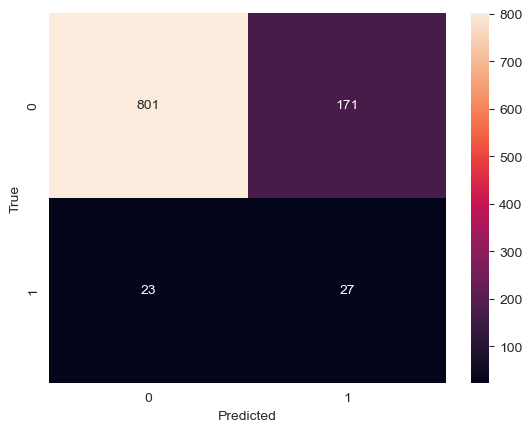

In [333]:
# Compute confusion matrix
conf_matrix_knn_mmk7 = confusion_matrix(y_test, y_test_pred_knn_mmk7)

# Plot confusion matrix
sns.heatmap(conf_matrix_knn_mmk7, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [334]:
# KNN with n_neighbors=19
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=19)

# Fit the model
knn_mm.fit(X_train, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train, y_train)
knn_mm_test = knn_mm.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8758035484700437
Test Accuracy: 0.7886497064579256


In [335]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_knn_mm19 = knn_mm.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA



print(f'Recall score: {recall_score(y_test, y_test_pred_knn_mm19)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_knn_mm19)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_knn_mm19)*100:0.1f}%')



0    972
1     50
Name: stroke, dtype: int64

Recall score: 60.0%
Precision score: 13.3%
F1 score: 21.7%


In [336]:
# predict classification
y_test_pred_knn_mm19 = knn_mm.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA



report_initial = classification_report(y_test, y_test_pred_knn_mm19)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       972
           1       0.13      0.60      0.22        50

    accuracy                           0.79      1022
   macro avg       0.55      0.70      0.55      1022
weighted avg       0.93      0.79      0.85      1022



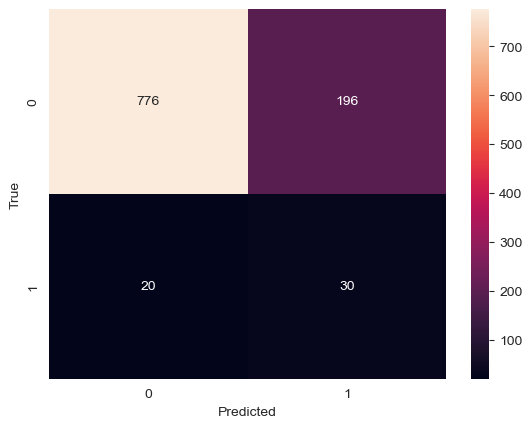

In [337]:
# Compute confusion matrix
conf_matrix_knn_mmk19 = confusion_matrix(y_test, y_test_pred_knn_mm19)

# Plot confusion matrix
sns.heatmap(conf_matrix_knn_mmk19, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree

In [202]:
# number of rows
X_train.shape[0]

7778

In [203]:
# indicating range of max_depth values
range(1, int(np.sqrt(X_train.shape[0])))

range(1, 88)

In [204]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the depths
for max_depth in depths:

    # Instantiate the model
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    dt.fit(X_train, y_train)

    # Score the model
    train_acc_ss.append(dt.score(X_train, y_train))
    test_acc_ss.append(dt.score(X_test, y_test))

stop = time.time()
runtime_dt_mm = stop-start
print(f"Runtime: {round(runtime_dt_mm,2)} seconds")

Runtime: 3.8 seconds


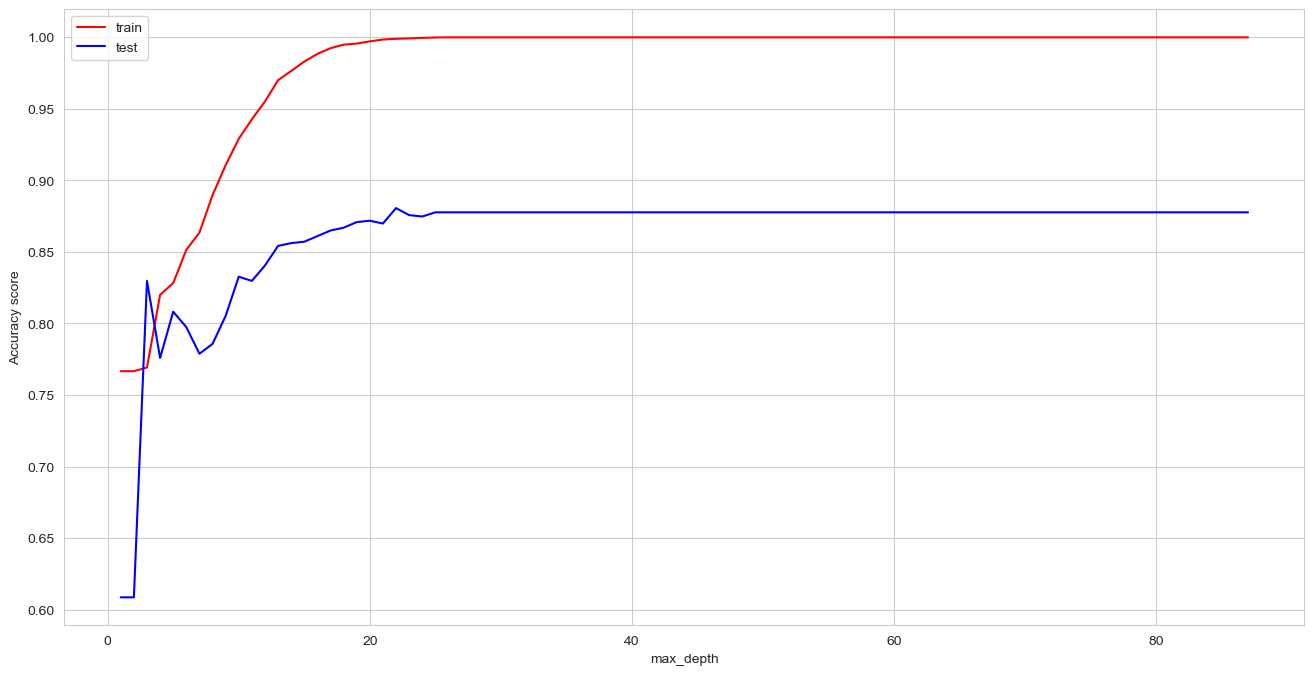

In [205]:
# Plot the accuracies
plt.figure(figsize=(16,8))
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel("max_depth")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

max_depth=3 and 5 appears to be optimal.

In [206]:
# Best Decision Tree Classifier on standardized data and max_depth=3
# Instantiate the model
dt_ss = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model
dt_ss.fit(X_train, y_train)

# Store accuracy scores
dt_ss_train = dt_ss.score(X_train, y_train)
dt_ss_test = dt_ss.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.7692208794034456
Test Accuracy: 0.8297455968688845


In [207]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_dt_ss = dt_ss.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA


print(f'Recall score: {recall_score(y_test, y_test_pred_dt_ss)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_dt_ss)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_dt_ss)*100:0.1f}%')

0    972
1     50
Name: stroke, dtype: int64

Recall score: 66.0%
Precision score: 17.4%
F1 score: 27.5%


In [208]:
report_initial = classification_report(y_test, y_test_pred_dt_ss)
print(report_initial)

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       972
           1       0.17      0.66      0.28        50

    accuracy                           0.83      1022
   macro avg       0.58      0.75      0.59      1022
weighted avg       0.94      0.83      0.87      1022



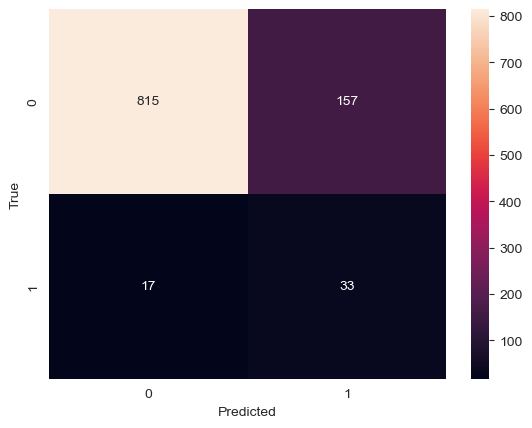

In [209]:
# Compute confusion matrix
conf_matrix_dt_ss = confusion_matrix(y_test, y_test_pred_dt_ss)

# Plot confusion matrix
sns.heatmap(conf_matrix_dt_ss, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [210]:
# Best Decision Tree Classifier on standardized data 
# Instantiate the model
dt_ssn = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
dt_ssn.fit(X_train, y_train)

# Store accuracy scores
dt_ss_train = dt_ssn.score(X_train, y_train)
dt_ss_test = dt_ssn.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.8282334790434559
Test Accuracy: 0.8082191780821918


In [211]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_dt_ssn = dt_ssn.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA


print(f'Recall score: {recall_score(y_test, y_test_pred_dt_ssn)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_dt_ssn)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_dt_ssn)*100:0.1f}%')

0    972
1     50
Name: stroke, dtype: int64

Recall score: 68.0%
Precision score: 15.9%
F1 score: 25.8%


In [212]:
report_initial = classification_report(y_test, y_test_pred_dt_ssn)
print(report_initial)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       972
           1       0.16      0.68      0.26        50

    accuracy                           0.81      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.81      0.86      1022



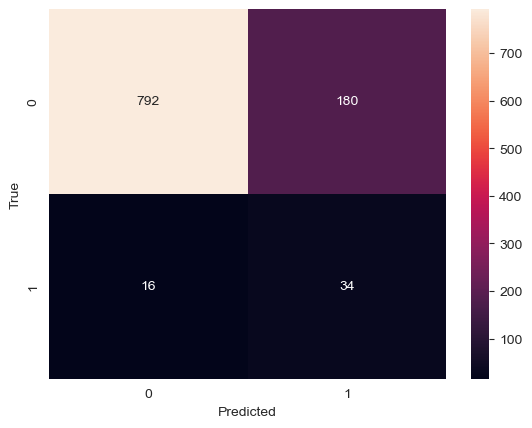

In [213]:
# Compute confusion matrix
conf_matrix_dt_ssn = confusion_matrix(y_test, y_test_pred_dt_ssn)

# Plot confusion matrix
sns.heatmap(conf_matrix_dt_ssn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [214]:
# to do checkk for optimize one factor

In [215]:
from sklearn.model_selection import GridSearchCV


#### Pipe line for decision Tree

In [314]:
# Define the model
dt = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 6, 10 ,12],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20, 30, None]  # 'None' means unlimited
}


In [315]:
# Initialize GridSearchCV
gs = GridSearchCV(dt, param_grid, scoring='recall', cv=5)

In [316]:
# Fit GridSearchCV
gs.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 10, 12],
                         'max_leaf_nodes': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 5, 10]},
             scoring='recall')

In [317]:
# Best parameters
print("Best Parameters:", gs.best_params_)

# Best F1 score
print("Best F1 Score:", gs.best_score_)

# Best model
best_model = gs.best_estimator_

# Predictions with the best model
y_pred_dt_best = best_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.9400912480603998
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.12      0.34      0.18        50

    accuracy                           0.84      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.92      0.84      0.88      1022



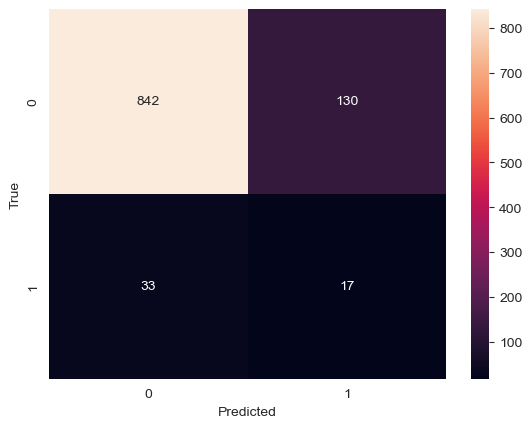

In [318]:
# Compute confusion matrix
conf_matrix_dt_ss_best = confusion_matrix(y_test, y_pred_dt_best)

# Plot confusion matrix
sns.heatmap(conf_matrix_dt_ss_best, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Support Vector Machines

In [228]:
from sklearn.svm import LinearSVC

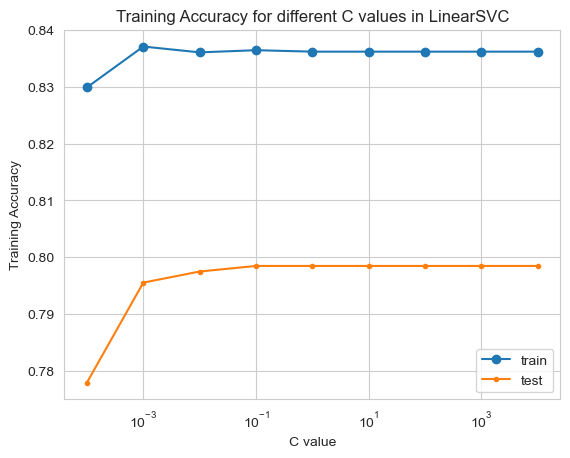

[0.8299048598611468,
 0.8371046541527385,
 0.8360761121110826,
 0.8364618153767035,
 0.8362046798662895,
 0.8362046798662895,
 0.8362046798662895,
 0.8362046798662895,
 0.8362046798662895]

In [136]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]
training_scores = []
test_scores = []

for c in C_values:
    SVM_model = LinearSVC(C=c, max_iter=1000,dual=False)
    SVM_model.fit(X_train, y_train)
    training_scores.append(SVM_model.score(X_train, y_train))
    test_scores.append(SVM_model.score(X_test, y_test))

# Plotting the training scores
plt.plot(C_values, training_scores, marker='o',label='train')
plt.plot(C_values, test_scores, marker='.',label="test")
plt.xscale('log')  # Since C_values vary on a logarithmic scale
plt.xlabel('C value')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for different C values in LinearSVC')
plt.legend()
plt.show()
training_scores

In [137]:
# Instantiate the model
SVM_model = LinearSVC(C=0.01,max_iter=100000,dual=False)

# Fit the model
SVM_model.fit(X_train, y_train)

# Store accuracy scores
SVM_model_train = SVM_model.score(X_train, y_train)
SVM_model_test = SVM_model.score(X_test, y_test)

# Score the model
print(f"Train Accuracy: {SVM_model_train}")
print(f"Test Accuracy: {SVM_model_test}")

Train Accuracy: 0.8360761121110826
Test Accuracy: 0.7974559686888454


In [138]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_SVM_model = SVM_model.predict(X_test) # USING THE UNSAMPLED BUT SCALED TEST DATA



print(f'Recall score: {recall_score(y_test, y_test_pred_SVM_model)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_SVM_model)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_SVM_model)*100:0.1f}%')

0    972
1     50
Name: stroke, dtype: int64

Recall score: 50.0%
Precision score: 12.1%
F1 score: 19.5%


In [139]:
report_initial = classification_report(y_test, y_test_pred_SVM_model)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       972
           1       0.12      0.50      0.19        50

    accuracy                           0.80      1022
   macro avg       0.55      0.66      0.54      1022
weighted avg       0.93      0.80      0.85      1022



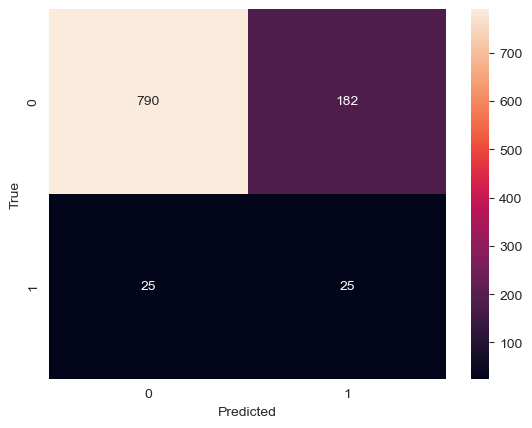

In [140]:
# Compute confusion matrix
conf_matrix_SVM_model = confusion_matrix(y_test, y_test_pred_SVM_model)

# Plot confusion matrix
sns.heatmap(conf_matrix_SVM_model, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [143]:
from sklearn.decomposition import PCA

In [248]:
my_PCA = PCA()
my_PCA.fit(X_train)

# transform data 
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [249]:
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  2.266
Variance captured by PC2:  1.217
Proportion of variance captured by PC1:  0.206
Proportion of variance captured by PC2:  0.111


In [250]:
my_PCA.explained_variance_ratio_

array([0.20598384, 0.11060501, 0.10014622, 0.09077205, 0.08822488,
       0.0824581 , 0.07748345, 0.07636705, 0.06496501, 0.06176318,
       0.0412312 ])

In [251]:
expl_var = my_PCA.explained_variance_ratio_

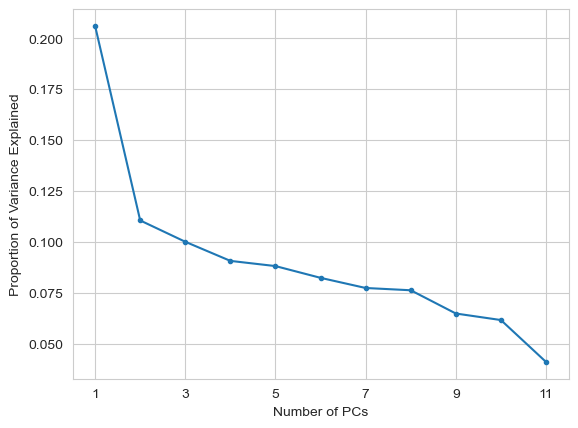

In [252]:
plt.figure()
plt.plot(range(1,12),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,12,2))
plt.show()

In [253]:
# Pull out the explained variance ratio
expl_var = my_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.20598384, 0.31658885, 0.41673507, 0.50750712, 0.595732  ,
       0.6781901 , 0.75567355, 0.83204061, 0.89700562, 0.9587688 ,
       1.        ])

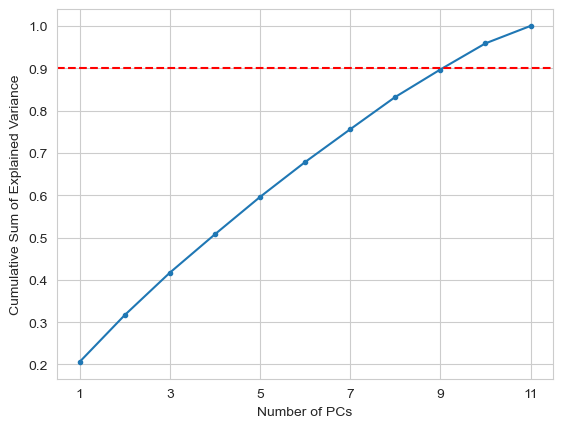

In [254]:
# Plot out the cumulative sum graph

plt.figure()
plt.plot(range(1,12), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,12,2))
plt.show()

In [255]:
# Instantiate and fit
my_PCA = PCA(n_components = 8)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)


In [256]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (7778, 11)
PCA Transformed: (7778, 8)


In [257]:
# Instantiate and fit
my_PCA = PCA(n_components = 0.90)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [258]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (7778, 11)
PCA Transformed: (7778, 10)


In [259]:
# Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression(C=1, random_state=42,max_iter=100000)

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA, y_test)}')

Train Score: 0.805476986371818
Test Score: 0.7759295499021527


In [260]:
# class distribution
display(y_test.value_counts())

# predict classification
y_test_pred_PCA = my_logreg_PCA.predict(X_test_PCA) # USING THE UNSAMPLED BUT SCALED TEST DATA


print(f'Recall score: {recall_score(y_test, y_test_pred_PCA)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred_PCA)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred_PCA)*100:0.1f}%')

0    972
1     50
Name: stroke, dtype: int64

Recall score: 50.0%
Precision score: 10.9%
F1 score: 17.9%


Since the number of columns are not significant, PCA is not a good method for feature enginering

In [261]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_test_pred_PCA)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.11      0.50      0.18        50

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.52      1022
weighted avg       0.93      0.78      0.84      1022



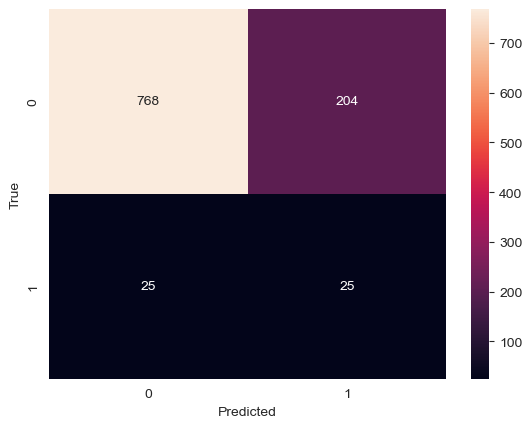

In [262]:
# Compute confusion matrix
conf_matrix_PCA = confusion_matrix(y_test, y_test_pred_PCA)

# Plot confusion matrix
sns.heatmap(conf_matrix_PCA, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

💡 Recommendation: The goal should be to minimize false negatives as much as possible to avoid under-predicting the 'Stroke' class, while also reducing false positives to avoid over-predicting the 'Stroke' class. This could potentially be achieved by further tuning the model's parameters, exploring different algorithms, or engineering new features.

In [263]:
# check the Logestic model performance with Statsmodels 
import statsmodels.api as sm

# Add a constant to the predictor variable set to include an intercept in the model
X_with_cons = sm.add_constant(X_train)

# Fit the logistic regression model
model = sm.Logit(y_train, X_with_cons).fit()

# Get the summary of the model
summary = model.summary2().tables[1] 

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary)

Optimization terminated successfully.
         Current function value: 0.365442
         Iterations 7


In [264]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.473    
Dependent Variable: stroke           AIC:              5708.8229
Date:               2024-02-01 22:06 BIC:              5792.3316
No. Observations:   7778             Log-Likelihood:   -2842.4  
Df Model:           11               LL-Null:          -5391.3  
Df Residuals:       7766             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const   -0.1945     0.0377    -5.1667   0.0000   -0.2683   -0.1207
x1      -0.4817     0.0342   -14.0903   0.0000   -0.5488   -0.4147
x2       2.0000     0.0547    36.5890   0.0000    1.8929    2.1072
x3      -0.2624     0.0316    -8.3014   0.0000   -0.3243   -0.2004
x4      -0.2451     0.0296    -8.2717   0.0000   -0.3032   -0.1870
x5      -0.5129     0.0422   -12.1409   0.0000   -0.5957   -0.4301
x6      -0.3120     0.0355    -8.7924   0.0000   -0.3816   -0.2425
x7      -0.6189     0.0348   -17.7869   0.0000   -0.6871   -0.5507
x8       0.3706     0.0360    10.2951   0.0000    0.3001    0.4412
x9       0.1517     0.0368     4.1242   0.0000    0.0796    0.2237
x10     -0.5909     0.0365   -16.1930   0.0000   -0.6624   -0.5194
x11      0.7941     0.0451    17.6045   0.0000    0.7057    0.8825
================================================================

"""

In [265]:
# get accuracies for model
X_test_const = sm.add_constant(X_test)
# Predict probabilities
y_pred_prob = model.predict(X_test_const)

# Convert probabilities to class labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_sm = (y_pred_prob > 0.3).astype(int)

In [266]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred_sm)
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred_sm)
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, y_pred_sm)
print("Precision:", precision)

F1 Score: 0.18229166666666666
Recall: 0.7
Precision: 0.10479041916167664


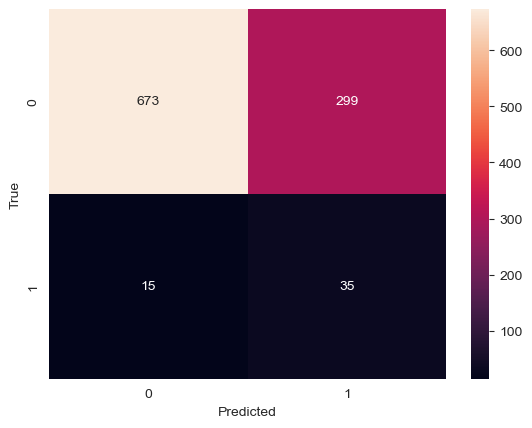

In [267]:
# Compute confusion matrix
conf_matrix_sm = confusion_matrix(y_test, y_pred_sm)

# Plot confusion matrix
sns.heatmap(conf_matrix_sm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [271]:
# Instantiate lists to save scores in
decision_tree_train_scores = []
decision_tree_test_scores = []

# For each tree, score on train and test
for sub_tree in random_forest_model.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train, y_train))
    decision_tree_test_scores.append(sub_tree.score(X_test, y_test))

# Rather than many separate print() statements, we can combine them into one using triple quotes.
print(f"""
Performance on fitted data:
best Decision Tree: {np.max(decision_tree_train_scores)}
Random Forest: {random_forest_model.score(X_train, y_train)}
----------------
Performance on test data:
best Decision Tree: {np.max(decision_tree_test_scores)}
Random Forest: {random_forest_model.score(X_test, y_test)}
""")


Performance on fitted data:
best Decision Tree: 0.9695294420159424
Random Forest: 1.0
----------------
Performance on test data:
best Decision Tree: 0.863013698630137
Random Forest: 0.8913894324853229



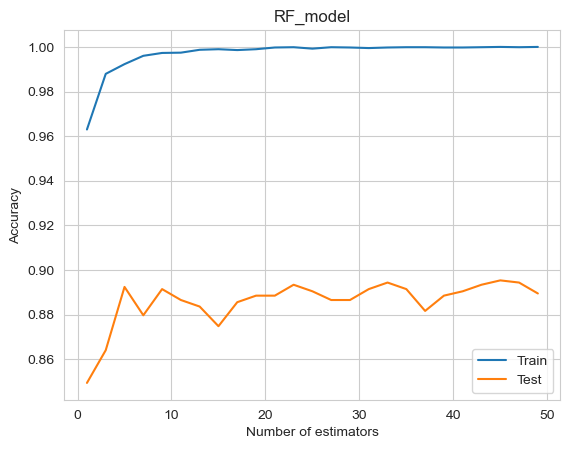

In [272]:
# Q1
train_scores = []
test_scores = []
n_range = range(1, 50,2)

for n in n_range:
    RF_model = RandomForestClassifier(n_estimators=n)
    RF_model.fit(X_train, y_train)
    train_scores.append(RF_model.score(X_train, y_train))
    test_scores.append(RF_model.score(X_test, y_test))
    
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("RF_model")
plt.legend();

In [273]:
RF_model = RandomForestClassifier(n_estimators=5)
RF_model.fit(X_train, y_train)
print(RF_model.score(X_train, y_train))
print(RF_model.score(X_test, y_test))

0.9934430444844433
0.8806262230919765


In [274]:
# class distribution
display(y_test.value_counts())

# predict classification
y_pred_RF_model = RF_model.predict(X_test)


print(f'Recall score: {recall_score(y_test, y_pred_RF_model)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test, y_pred_RF_model)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test, y_pred_RF_model)*100:0.1f}%')


report_initial_dt_ss = classification_report(y_test, y_pred_RF_model)
print(report_initial_dt_ss)

0    972
1     50
Name: stroke, dtype: int64

Recall score: 24.0%
Precision score: 12.5%
F1 score: 16.4%
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022



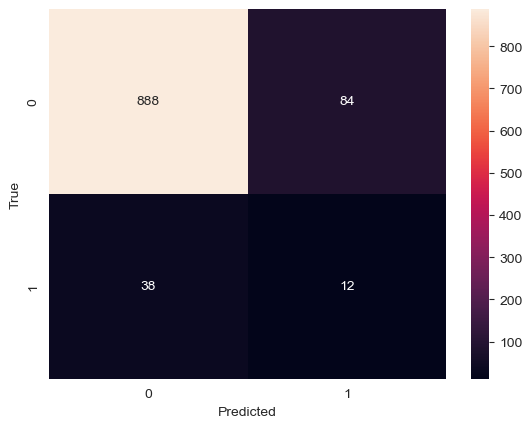

In [310]:
# Compute confusion matrix
conf_matrix_RF_model = confusion_matrix(y_test, y_pred_RF_model)

# Plot confusion matrix
sns.heatmap(conf_matrix_RF_model, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### GradientBoostingClassifier

In [276]:
from sklearn.ensemble import GradientBoostingClassifier

g_b_model = GradientBoostingClassifier(random_state=42)

g_b_model.fit(X_train, y_train)

y_pred_g_b_model = g_b_model.predict(X_test)

In [277]:
g_b_model.score(X_test, y_test)

0.8424657534246576

In [278]:
report_initial_g_b_model= classification_report(y_test, y_pred_g_b_model)
print(report_initial_g_b_model)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.16      0.50      0.24        50

    accuracy                           0.84      1022
   macro avg       0.56      0.68      0.57      1022
weighted avg       0.93      0.84      0.88      1022



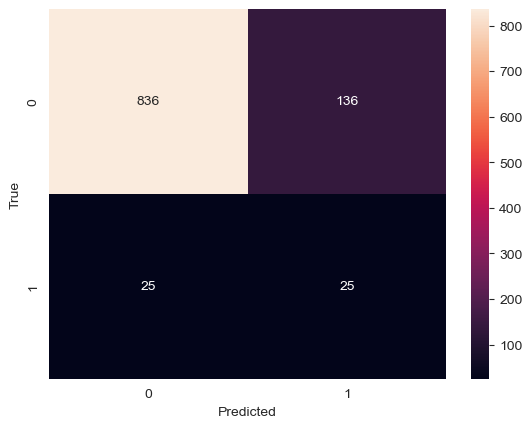

In [279]:
# Compute confusion matrix
conf_matrix_g_b_model = confusion_matrix(y_test, y_pred_g_b_model)

# Plot confusion matrix
sns.heatmap(conf_matrix_g_b_model, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### NN tensorflow

In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [281]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [282]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.4328 - accuracy: 0.7980 - val_loss: 0.4864 - val_accuracy: 0.7648
Epoch 2/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8398 - val_loss: 0.3604 - val_accuracy: 0.8715
Epoch 3/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8500 - val_loss: 0.3732 - val_accuracy: 0.8522
Epoch 4/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8603 - val_loss: 0.3548 - val_accuracy: 0.8670
Epoch 5/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.3125 - accuracy: 0.8621 - val_loss: 0.2750 - val_accuracy: 0.9017
Epoch 6/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.8655 - val_loss: 0.3759 - val_accuracy: 0.8470
Epoch 7/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.8680 - val_loss: 0.2968 - val_accuracy:

195/195 [==============================] - 1s 3ms/step - loss: 0.1769 - accuracy: 0.9301 - val_loss: 0.2048 - val_accuracy: 0.9396
Epoch 58/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9301 - val_loss: 0.2327 - val_accuracy: 0.9280
Epoch 59/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9293 - val_loss: 0.1734 - val_accuracy: 0.9569
Epoch 60/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1734 - accuracy: 0.9322 - val_loss: 0.1838 - val_accuracy: 0.9460
Epoch 61/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.9323 - val_loss: 0.2147 - val_accuracy: 0.9383
Epoch 62/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9375 - val_loss: 0.2198 - val_accuracy: 0.9319
Epoch 63/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1690 - accuracy: 0.9306 - val_loss: 0.1881 - val_accuracy: 0.9422

195/195 [==============================] - 1s 3ms/step - loss: 0.1295 - accuracy: 0.9516 - val_loss: 0.1853 - val_accuracy: 0.9473
Epoch 114/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9499 - val_loss: 0.1713 - val_accuracy: 0.9512
Epoch 115/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9482 - val_loss: 0.1495 - val_accuracy: 0.9544
Epoch 116/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9489 - val_loss: 0.1598 - val_accuracy: 0.9531
Epoch 117/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1299 - accuracy: 0.9502 - val_loss: 0.1752 - val_accuracy: 0.9460
Epoch 118/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9521 - val_loss: 0.1733 - val_accuracy: 0.9422
Epoch 119/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9534 - val_loss: 0.1623 - val_accuracy: 

195/195 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9593 - val_loss: 0.1457 - val_accuracy: 0.9557
Epoch 170/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1050 - accuracy: 0.9606 - val_loss: 0.1521 - val_accuracy: 0.9486
Epoch 171/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9598 - val_loss: 0.2200 - val_accuracy: 0.9287
Epoch 172/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9597 - val_loss: 0.1489 - val_accuracy: 0.9602
Epoch 173/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9587 - val_loss: 0.2418 - val_accuracy: 0.9132
Epoch 174/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.1049 - accuracy: 0.9601 - val_loss: 0.1184 - val_accuracy: 0.9614
Epoch 175/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9616 - val_loss: 0.1094 - val_accuracy: 

195/195 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9672 - val_loss: 0.1349 - val_accuracy: 0.9557
Epoch 226/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9658 - val_loss: 0.1711 - val_accuracy: 0.9447
Epoch 227/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9664 - val_loss: 0.2058 - val_accuracy: 0.9409
Epoch 228/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9696 - val_loss: 0.2124 - val_accuracy: 0.9319
Epoch 229/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9651 - val_loss: 0.1855 - val_accuracy: 0.9383
Epoch 230/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9651 - val_loss: 0.1865 - val_accuracy: 0.9415
Epoch 231/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9690 - val_loss: 0.2289 - val_accuracy: 

195/195 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9701 - val_loss: 0.1336 - val_accuracy: 0.9653
Epoch 282/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9706 - val_loss: 0.1339 - val_accuracy: 0.9576
Epoch 283/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9688 - val_loss: 0.1405 - val_accuracy: 0.9505
Epoch 284/1000
195/195 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9720 - val_loss: 0.3178 - val_accuracy: 0.8952
Epoch 285/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9746 - val_loss: 0.1503 - val_accuracy: 0.9569
Epoch 286/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9693 - val_loss: 0.2022 - val_accuracy: 0.9402
Epoch 287/1000
195/195 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9728 - val_loss: 0.1363 - val_accuracy: 

195/195 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9722 - val_loss: 0.1984 - val_accuracy: 0.9428
Epoch 338/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.0699 - accuracy: 0.9736 - val_loss: 0.2104 - val_accuracy: 0.9422
Epoch 339/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.0694 - accuracy: 0.9744 - val_loss: 0.1779 - val_accuracy: 0.9512
Epoch 340/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9752 - val_loss: 0.2076 - val_accuracy: 0.9357
Epoch 341/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9769 - val_loss: 0.2119 - val_accuracy: 0.9377
Epoch 342/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0663 - accuracy: 0.9754 - val_loss: 0.1967 - val_accuracy: 0.9441
Epoch 343/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.9741 - val_loss: 0.1842 - val_accuracy: 

195/195 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9775 - val_loss: 0.2216 - val_accuracy: 0.9370
Epoch 394/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9759 - val_loss: 0.2433 - val_accuracy: 0.9216
Epoch 395/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9786 - val_loss: 0.2407 - val_accuracy: 0.9319
Epoch 396/1000
195/195 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9783 - val_loss: 0.1782 - val_accuracy: 0.9524
Epoch 397/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9799 - val_loss: 0.2503 - val_accuracy: 0.9312
Epoch 398/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.2487 - val_accuracy: 0.9325
Epoch 399/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9799 - val_loss: 0.2648 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9772 - val_loss: 0.2183 - val_accuracy: 0.9389
Epoch 450/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9810 - val_loss: 0.2748 - val_accuracy: 0.9235
Epoch 451/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.2026 - val_accuracy: 0.9499
Epoch 452/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9786 - val_loss: 0.1784 - val_accuracy: 0.9595
Epoch 453/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0549 - accuracy: 0.9814 - val_loss: 0.1623 - val_accuracy: 0.9608
Epoch 454/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9788 - val_loss: 0.1589 - val_accuracy: 0.9544
Epoch 455/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9797 - val_loss: 0.1576 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9834 - val_loss: 0.2624 - val_accuracy: 0.9267
Epoch 506/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9817 - val_loss: 0.1920 - val_accuracy: 0.9602
Epoch 507/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9797 - val_loss: 0.2346 - val_accuracy: 0.9428
Epoch 508/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9828 - val_loss: 0.2600 - val_accuracy: 0.9312
Epoch 509/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9804 - val_loss: 0.2173 - val_accuracy: 0.9422
Epoch 510/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9809 - val_loss: 0.1644 - val_accuracy: 0.9582
Epoch 511/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9788 - val_loss: 0.2662 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9839 - val_loss: 0.2063 - val_accuracy: 0.9518
Epoch 562/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9822 - val_loss: 0.2356 - val_accuracy: 0.9454
Epoch 563/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9822 - val_loss: 0.2226 - val_accuracy: 0.9389
Epoch 564/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9826 - val_loss: 0.2152 - val_accuracy: 0.9402
Epoch 565/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9820 - val_loss: 0.2317 - val_accuracy: 0.9402
Epoch 566/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9826 - val_loss: 0.2577 - val_accuracy: 0.9402
Epoch 567/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9822 - val_loss: 0.2174 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9823 - val_loss: 0.2766 - val_accuracy: 0.9319
Epoch 618/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9834 - val_loss: 0.3328 - val_accuracy: 0.9171
Epoch 619/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9830 - val_loss: 0.1939 - val_accuracy: 0.9563
Epoch 620/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9849 - val_loss: 0.2246 - val_accuracy: 0.9434
Epoch 621/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9836 - val_loss: 0.2551 - val_accuracy: 0.9396
Epoch 622/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9804 - val_loss: 0.2179 - val_accuracy: 0.9499
Epoch 623/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9833 - val_loss: 0.2864 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.4812 - val_accuracy: 0.8708
Epoch 674/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9830 - val_loss: 0.2395 - val_accuracy: 0.9460
Epoch 675/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9847 - val_loss: 0.2478 - val_accuracy: 0.9389
Epoch 676/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9828 - val_loss: 0.2293 - val_accuracy: 0.9479
Epoch 677/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9828 - val_loss: 0.1765 - val_accuracy: 0.9634
Epoch 678/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9836 - val_loss: 0.3175 - val_accuracy: 0.9312
Epoch 679/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9842 - val_loss: 0.2385 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9839 - val_loss: 0.2594 - val_accuracy: 0.9434
Epoch 730/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9825 - val_loss: 0.2188 - val_accuracy: 0.9479
Epoch 731/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9839 - val_loss: 0.1634 - val_accuracy: 0.9647
Epoch 732/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9855 - val_loss: 0.2635 - val_accuracy: 0.9428
Epoch 733/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.1773 - val_accuracy: 0.9614
Epoch 734/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9849 - val_loss: 0.2505 - val_accuracy: 0.9357
Epoch 735/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.3307 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9857 - val_loss: 0.2695 - val_accuracy: 0.9428
Epoch 786/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.3085 - val_accuracy: 0.9242
Epoch 787/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.9863 - val_loss: 0.2884 - val_accuracy: 0.9396
Epoch 788/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9859 - val_loss: 0.2556 - val_accuracy: 0.9441
Epoch 789/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.3171 - val_accuracy: 0.9325
Epoch 790/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.1925 - val_accuracy: 0.9621
Epoch 791/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.9810 - val_loss: 0.2639 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.3478 - val_accuracy: 0.9254
Epoch 842/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9857 - val_loss: 0.3038 - val_accuracy: 0.9299
Epoch 843/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.2176 - val_accuracy: 0.9524
Epoch 844/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9855 - val_loss: 0.3234 - val_accuracy: 0.9216
Epoch 845/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9876 - val_loss: 0.2989 - val_accuracy: 0.9364
Epoch 846/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.3974 - val_accuracy: 0.9235
Epoch 847/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9855 - val_loss: 0.3225 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9875 - val_loss: 0.2434 - val_accuracy: 0.9524
Epoch 898/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9849 - val_loss: 0.3094 - val_accuracy: 0.9383
Epoch 899/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9887 - val_loss: 0.3440 - val_accuracy: 0.9248
Epoch 900/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9860 - val_loss: 0.2669 - val_accuracy: 0.9467
Epoch 901/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.2880 - val_accuracy: 0.9357
Epoch 902/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.2709 - val_accuracy: 0.9447
Epoch 903/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.2020 - val_accuracy: 

195/195 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9871 - val_loss: 0.3121 - val_accuracy: 0.9396
Epoch 954/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9860 - val_loss: 0.2476 - val_accuracy: 0.9473
Epoch 955/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.3236 - val_accuracy: 0.9344
Epoch 956/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.2631 - val_accuracy: 0.9563
Epoch 957/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9886 - val_loss: 0.3704 - val_accuracy: 0.9248
Epoch 958/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9868 - val_loss: 0.2925 - val_accuracy: 0.9389
Epoch 959/1000
195/195 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 0.2825 - val_accuracy: 

In [284]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


32/32 [==============================] - 0s 875us/step - loss: 1.6518 - accuracy: 0.8620
Test Accuracy: 86.20%


In [293]:
# Make predictions
y_pred_NN = model.predict(X_test)
y_pred_NN = (y_pred_NN > 0.5).astype("int32")  # Convert probabilities to binary outputs

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_NN)
recall = recall_score(y_test, y_pred_NN)
f1 = f1_score(y_test, y_pred_NN)

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Precision: 0.12396694214876033, Recall: 0.3, F1 Score: 0.1754385964912281


In [294]:
report_initial_NN_model = classification_report(y_test, y_pred_NN)
print(report_initial_NN_model)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.12      0.30      0.18        50

    accuracy                           0.86      1022
   macro avg       0.54      0.60      0.55      1022
weighted avg       0.92      0.86      0.89      1022



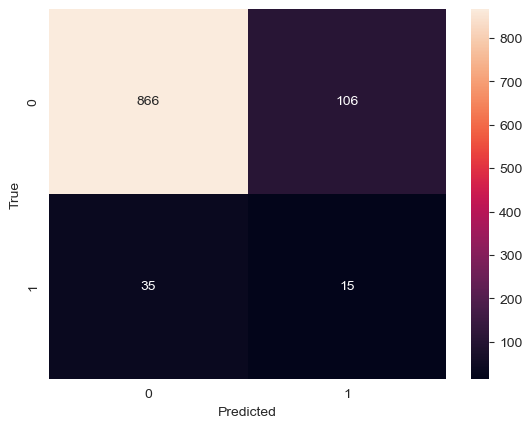

In [295]:
# Compute confusion matrix
conf_matrix_NN_model = confusion_matrix(y_test, y_pred_NN)

# Plot confusion matrix
sns.heatmap(conf_matrix_NN_model, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [296]:
#### plot confusion matrices for all models

In [319]:
#  actual confusion matrix objects
confusion_matrices = [conf_matrix_logit_ss,
conf_matrix_knn_mmk7,
conf_matrix_knn_mmk19,
conf_matrix_dt_ssn,
conf_matrix_SVM_model,
conf_matrix_PCA,
conf_matrix_sm,
conf_matrix_RF_model,
conf_matrix_g_b_model,
conf_matrix_NN_model]
titles = ['Logistic Regression (SM)', 
'Logistic Regression (SS)', 
'KNN with 7N',
'KNN with 19N',
'Decision Tree',
'SVM',
'PCA',
'Random Forest', 
'Gradient Boosting', 
'Neural Network']

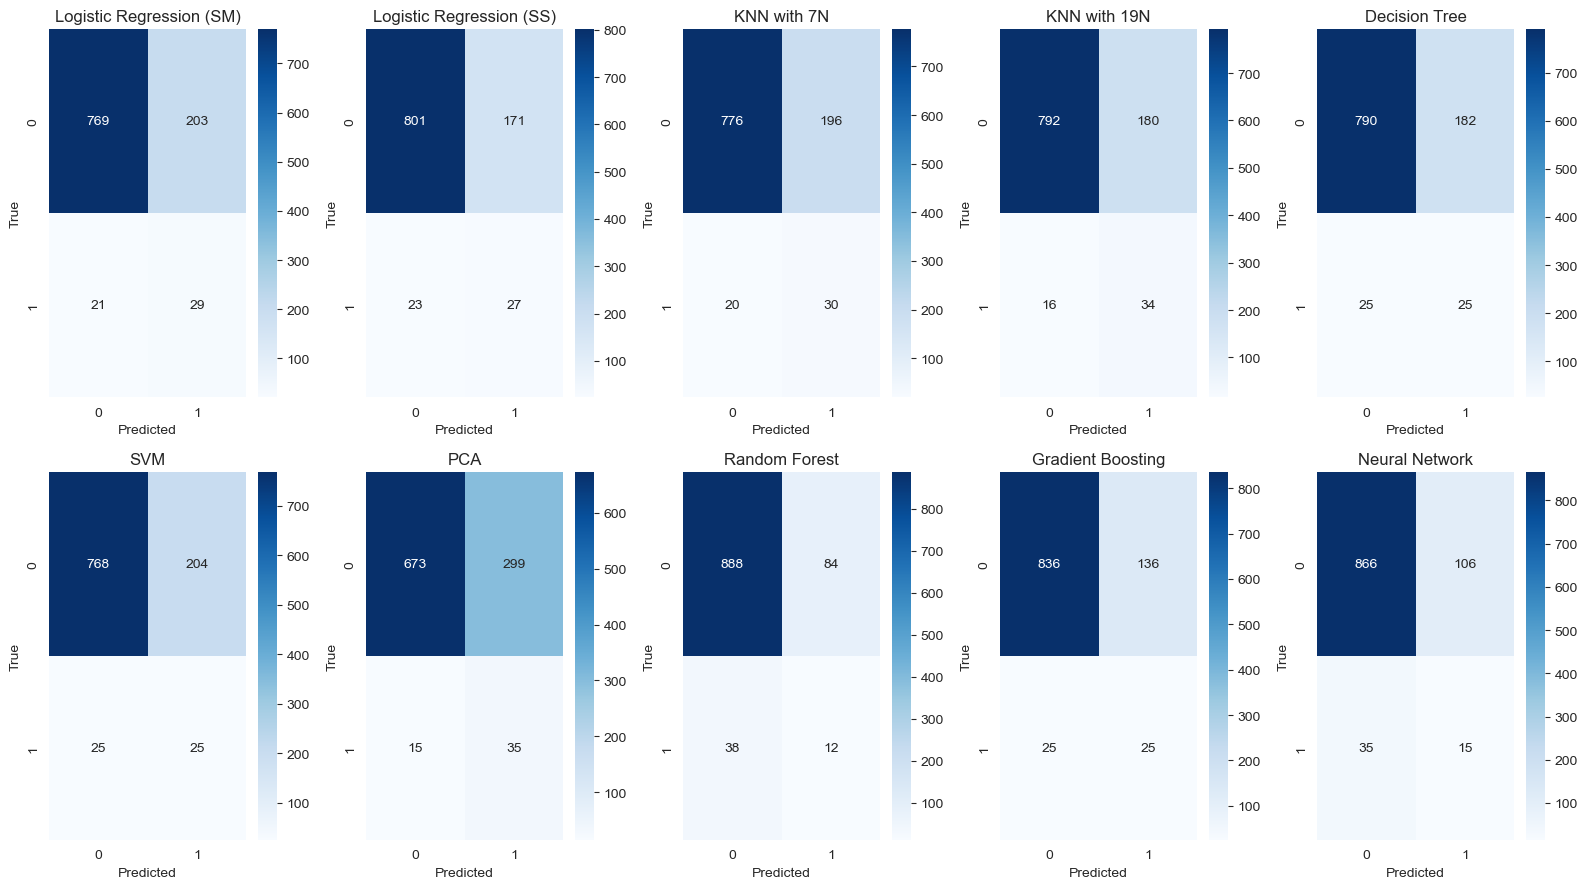

In [321]:



# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 9))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of axes

# Loop through each confusion matrix
for i, (model, title) in enumerate(zip(confusion_matrices, titles)):
    ax = axes[i]
    sns.heatmap(model, annot=True, fmt='d', ax=ax, cmap='Blues')  # Using 'Blues' colormap
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


In [340]:
# List of predictions from different models
predictions = [y_pred_sm, y_test_pred_logit_ss, y_test_pred_knn_mmk7, y_test_pred_knn_mm19, y_test_pred_dt_ssn,
               y_test_pred_SVM_model, y_test_pred_PCA, y_pred_RF_model, y_pred_g_b_model, y_pred_NN]
titles = ['Logistic Regression (SM)', 
'Logistic Regression (SS)', 
'KNN with 7N',
'KNN with 19N',
'Decision Tree',
'SVM',
'PCA',
'Random Forest', 
'Gradient Boosting', 
'Neural Network']
# Loop through each model's predictions and print the classification report
for y_pred, name in zip(predictions, titles):
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Classification Report for Logistic Regression (SM):
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       972
           1       0.10      0.70      0.18        50

    accuracy                           0.69      1022
   macro avg       0.54      0.70      0.50      1022
weighted avg       0.94      0.69      0.78      1022



Classification Report for Logistic Regression (SS):
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       972
           1       0.12      0.58      0.21        50

    accuracy                           0.78      1022
   macro avg       0.55      0.69      0.54      1022
weighted avg       0.93      0.78      0.84      1022



Classification Report for KNN with 7N:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.14      0.54      0.22        50

    accuracy                       

In [341]:
# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each model's predictions and calculate metrics
for y_pred in predictions:
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))


In [343]:


# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Model': titles,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})


<Figure size 2400x1200 with 0 Axes>

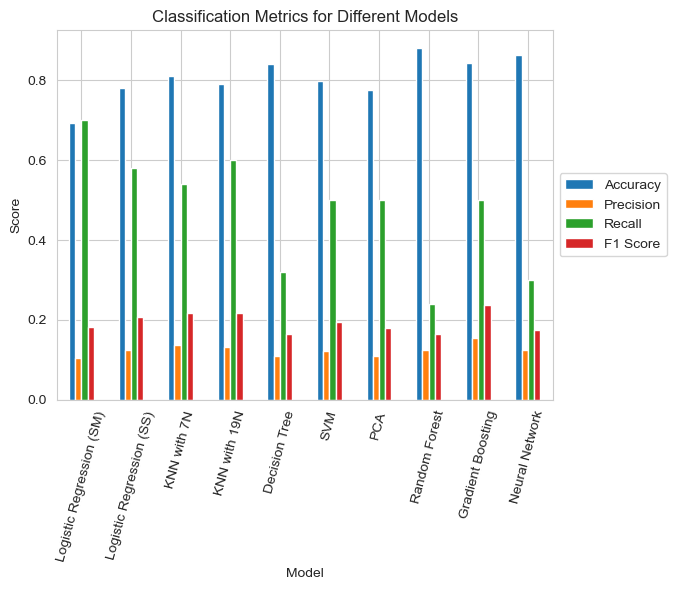

In [344]:
plt.figure(figsize=(24, 12))  
ax = metrics_df.set_index('Model').plot(kind='bar', rot=75)
plt.title('Classification Metrics for Different Models')
plt.ylabel('Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend to the side
plt.savefig('plot_name.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

